## **Maximizing CNN Validation Performance - Political Meme Classification**

<br></br>
### **Introduction**

This project focuses on designing and optimizing a convolutional neural network (CNN) for the classification of political memes into conservative and liberal viewpoints, aiming to achieve the highest possible accuracy on a validation set. The process includes employing techniques like early stopping and model checkpointing to monitor performance, and making adjustments to the CNN architecture based on changes in accuracy related to hyperparameters such as filters and layers. The task emphasizes reproducibility through a pre-determined data split and involves the creation of separate data generators for training, validation, and testing. The project’s success will be ultimately evaluated on an independent test set, with learning curves and detailed analysis included in the final report.


<br></br>
### **Dataset Source**



For this project, the image dataset was sourced by exploring meme-focused pages on social platforms such as Reddit, Facebook, and Pinterest. A total of 1,000 images were collected, with an equal distribution between conservative and liberal political themes.

Special thanks to `Kate Arendes` for contributions to the collection process.

<br></br>
<h3><b> Loading Python Libraries </b></h3>

In [1]:
import PIL
import numpy as np
from PIL import Image
from keras import layers
from tensorflow import keras
from keras import regularizers
from google.colab import drive
import matplotlib.pyplot as plt
from keras.metrics import Precision
from keras.preprocessing.image import ImageDataGenerator

<br></br>
### **Load the data: The Political Memes Classification Dataset**


- `First, lets download the images from google drive:`

In [2]:
# Let's mount the drive to load the images
drive.mount('/content/drive')

Mounted at /content/drive


<br></br>
### **Dataset Generation - Image Data Generator**

In [3]:
# Let's set the base directory for loading the political meme images
base_directory = "/content/drive/My Drive/Political Meme Dataset/"

# Let's initialize the ImageDataGenerator with rescaling to normalize pixel values
my_generator = ImageDataGenerator(rescale=1./255)

# Let's set up the training data generator
# This loads images of size 150x150, in batches of 4, with binary class labels
train_generator = my_generator.flow_from_directory(
    f"{base_directory}/training/",
    target_size=(150, 150),
    batch_size=4,
    class_mode='binary'
)

# Let's set up the validation data generator
# Loads images of the same size and batch size as the training generator
valid_generator = my_generator.flow_from_directory(
    f"{base_directory}/validation/",
    target_size=(150, 150),
    batch_size=4,
    class_mode='binary'
)

# Let's set up the test data generator
# Uses the same parameters for consistency across training, validation, and testing
test_generator = my_generator.flow_from_directory(
    f"{base_directory}/test/",
    target_size=(150, 150),
    batch_size=4,
    class_mode='binary'
)

Found 600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


<br></br>
### **Data Visualization**

In [4]:
# Let's load a single image using PIL library.
image = Image.open(f"{base_directory}/training/train_liberal/0f76446d7d65a9e6508a226ae33e8a51--felder-donald-oconnor.jpg")

# Let's get some details about the image.
print("Image Mode   -->", image.mode)
print("Image Format --> ", image.format)
print("Image Size   -->", image.size)

Image Mode   --> RGB
Image Format -->  JPEG
Image Size   --> (118, 108)


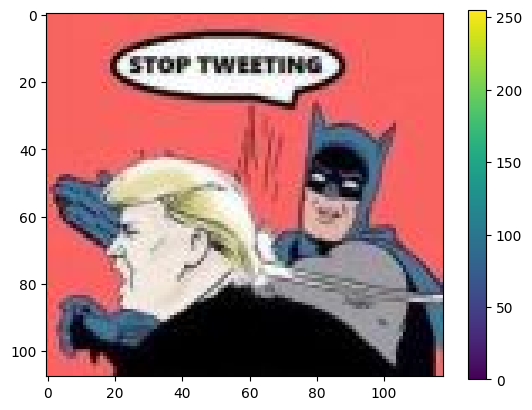

In [5]:
# Let's display the colored image
plt.imshow(np.asarray(image))
plt.colorbar()

<br></br>

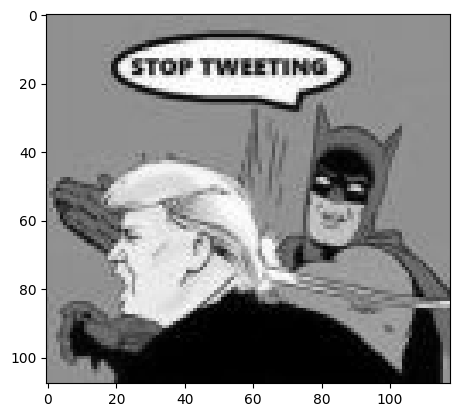

In [6]:
# Let's convert the input image to grayscale
gs_image = image.convert(mode='L')

# Let's display the grayscale image using matplotlib
plt.imshow(np.asarray(gs_image), cmap='gray')

(200, 200)


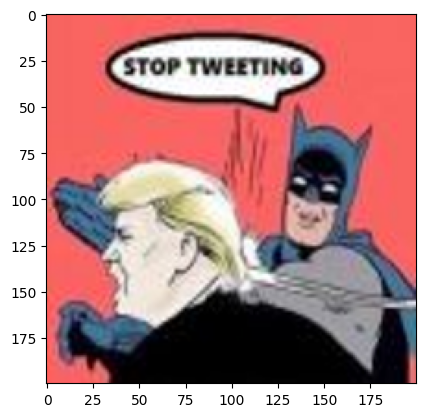

In [7]:
# Let's resize the image to 200x200 pixels
img_resized = image.resize((200,200))

# Let's print the size of the resized image to verify the new dimensions
print(img_resized.size)

# Let's display the resized image using matplotlib
plt.imshow(np.asarray(img_resized))

<br></br>
#### **Train Images - Data Visualization**

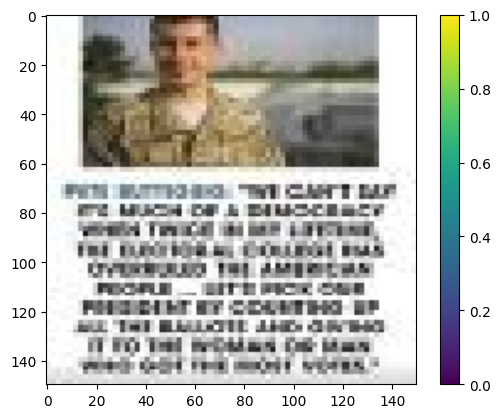

1.0


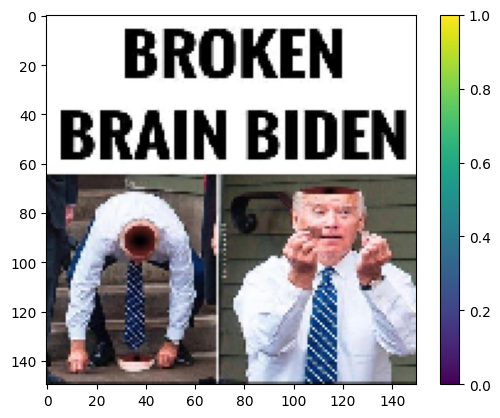

0.0


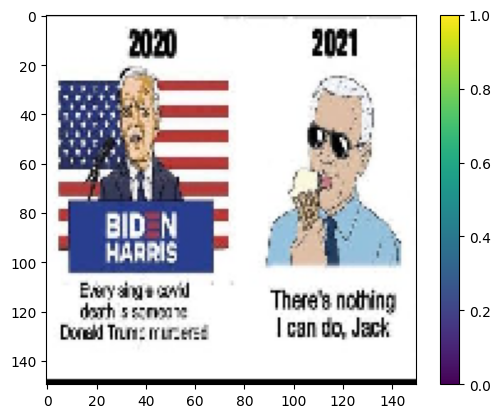

0.0


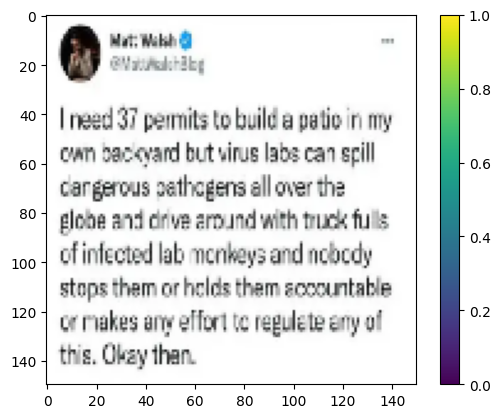

0.0


In [8]:
# Let's loop through batches of images from the train generator
for my_batch in train_generator:
    images = my_batch[0]
    labels = my_batch[1]

    # Let's iterate over each image and its corresponding label in the batch
    for i in range(len(labels)):
        plt.imshow(images[i])
        plt.colorbar()
        plt.show()

        # Let's print the label associated with the image
        print(labels[i])
    break

<br></br>
#### **Validation Images - Data Visualization**

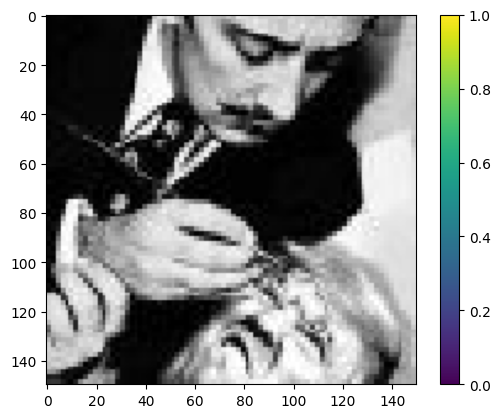

1.0


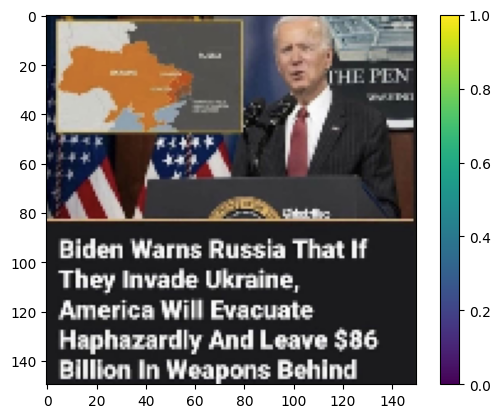

0.0


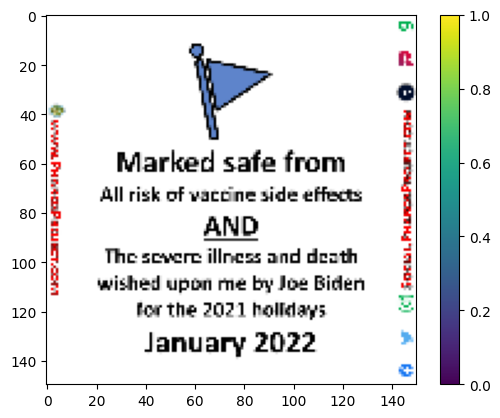

0.0


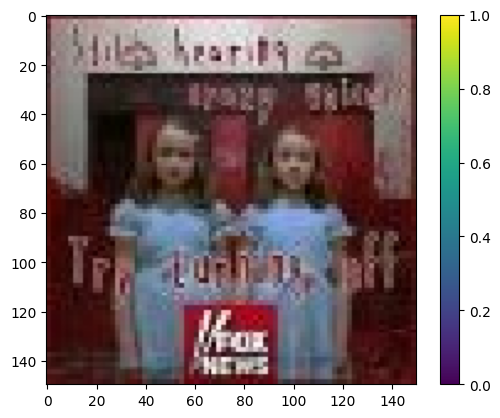

1.0


In [9]:
# Let's loop through batches of images from the validation generator
for my_batch in valid_generator:
    images = my_batch[0]
    labels = my_batch[1]

    # Let's iterate over each image and its corresponding label in the batch
    for i in range(len(labels)):
        plt.imshow(images[i])
        plt.colorbar()
        plt.show()

        # Let's print the label associated with the image
        print(labels[i])
    break

<br></br>
#### **Test Images - Data Visualization**

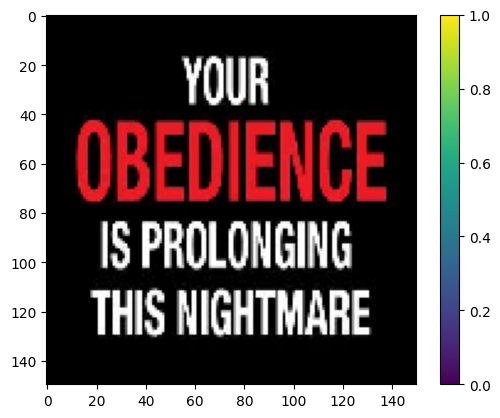

0.0


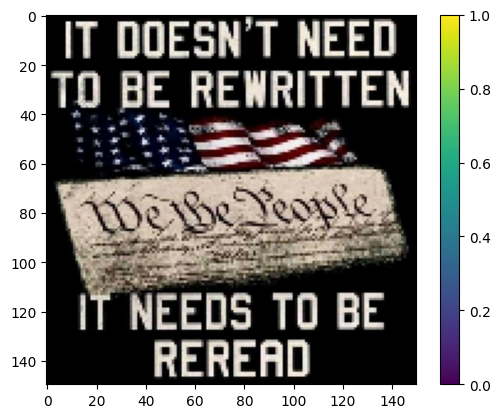

0.0


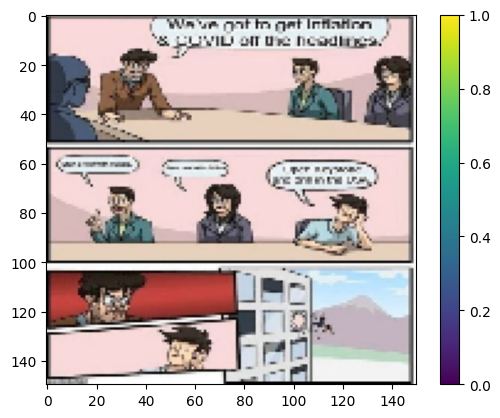

0.0


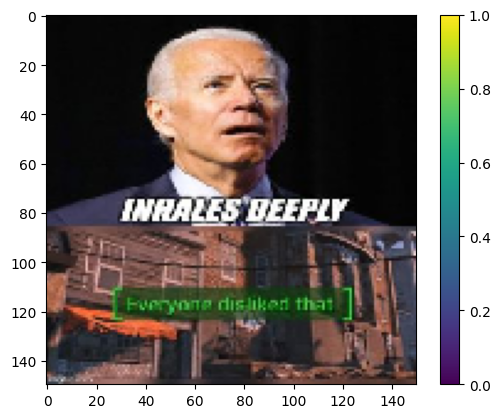

0.0


In [10]:
# Let's loop through batches of images from the test generator
for my_batch in test_generator:
    images = my_batch[0]
    labels = my_batch[1]

    # Let's iterate over each image and its corresponding label in the batch
    for i in range(len(labels)):
        plt.imshow(images[i])
        plt.colorbar()
        plt.show()

        # Let's print the label associated with the image
        print(labels[i])
    break

<br></br>
### **Model Building**

In [16]:
# Define the input shape and number of classes
input_shape = (150, 150, 3)
num_classes = 2

# Start defining the model
inputs = keras.Input(shape=input_shape)
x = layers.Conv2D(32, 3, padding='same', activation='relu')(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(128, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(128, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# Adding a couple more Conv2D and MaxPooling2D layers
x = layers.Conv2D(256, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# Global Average Pooling followed by the classifier
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)  # Common dropout rate for regularization

# Output layer
outputs = layers.Dense(1, activation='sigmoid')(x)

# Finalize the model
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_5 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 75, 75, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 37, 37, 128)       7385

In [17]:
# Let's compile the CNN model using binary cross_entropy as loss function and adam as optimizer
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', keras.metrics.Precision()])

In [18]:
# Let's define the callbacks for Model saving and Early stopping

cb_check = keras.callbacks.ModelCheckpoint(
    filepath="checkpoint_filepath",
    save_best_only=True,
    monitor="val_loss")

cb_early = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=30
)

In [19]:
# Let's train and validate model on the training and validation data

history = model.fit(train_generator, validation_data = valid_generator, epochs = 10, verbose = 1, batch_size = 8, callbacks = [cb_check, cb_early])

Epoch 1/10
150/150 [==============================] - 7s 36ms/step - loss: 0.6890 - accuracy: 0.5767 - precision_1: 0.5821 - val_loss: 0.6557 - val_accuracy: 0.6200 - val_precision_1: 0.5682
Epoch 2/10
150/150 [==============================] - 5s 32ms/step - loss: 0.5482 - accuracy: 0.7567 - precision_1: 0.7188 - val_loss: 0.3334 - val_accuracy: 0.9400 - val_precision_1: 0.8929
Epoch 3/10
150/150 [==============================] - 5s 32ms/step - loss: 0.4263 - accuracy: 0.8567 - precision_1: 0.8242 - val_loss: 0.2132 - val_accuracy: 0.9450 - val_precision_1: 0.9159
Epoch 4/10
150/150 [==============================] - 5s 32ms/step - loss: 0.3202 - accuracy: 0.8750 - precision_1: 0.8462 - val_loss: 0.2123 - val_accuracy: 0.9050 - val_precision_1: 0.9551
Epoch 5/10
150/150 [==============================] - 5s 33ms/step - loss: 0.2947 - accuracy: 0.8983 - precision_1: 0.8842 - val_loss: 0.1506 - val_accuracy: 0.9550 - val_precision_1: 0.9417
Epoch 6/10
150/150 [=========================

<br></br>
### **Model Evaluation(Precison, Recall, F1-score)**

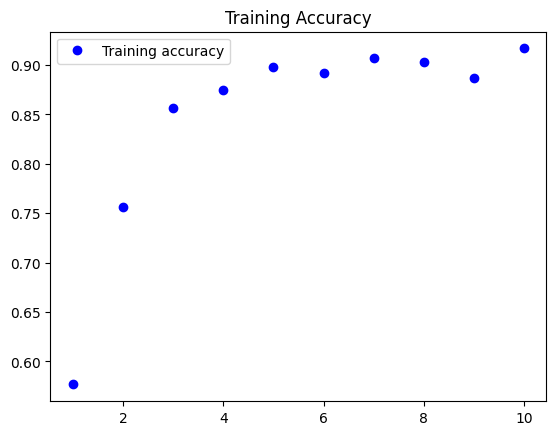

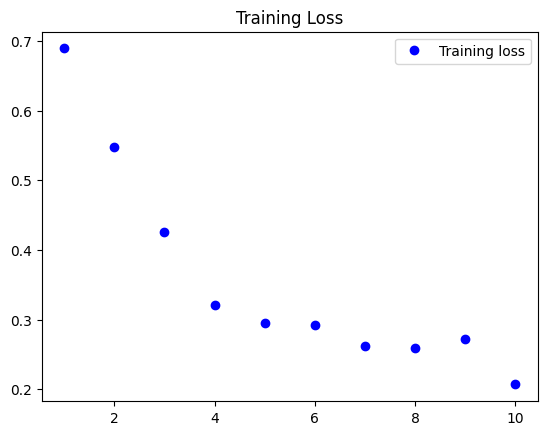

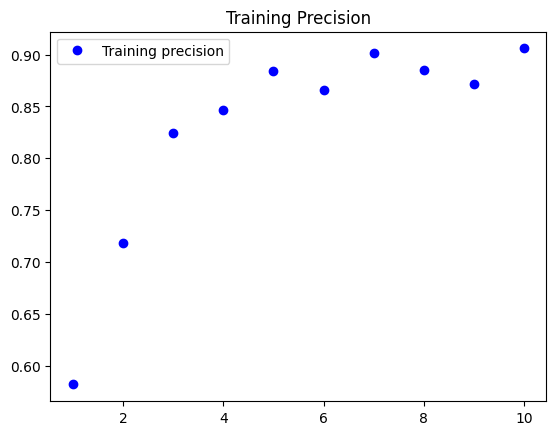

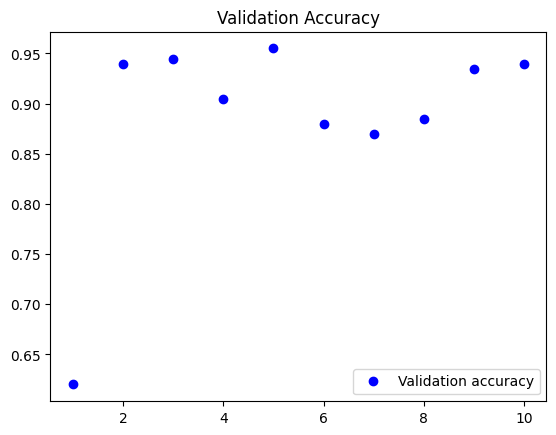

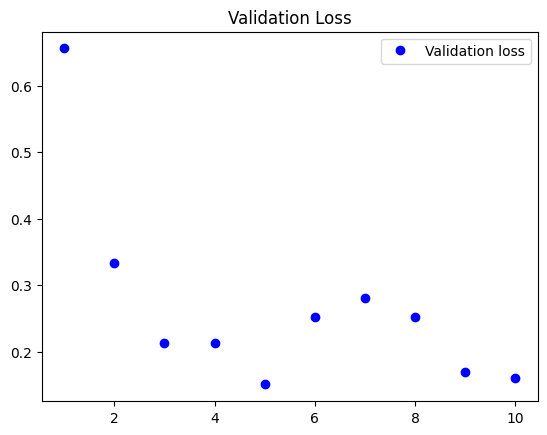

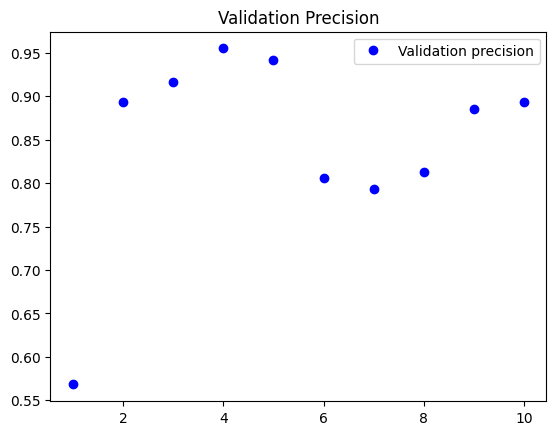

In [20]:
train_accuracy = history.history["accuracy"]
train_loss = history.history["loss"]
train_precision = history.history["precision_1"]
val_accuracy = history.history["val_accuracy"]
val_loss = history.history["val_loss"]
val_precision = history.history["val_precision_1"]
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, "bo", label="Training accuracy")
plt.title("Training Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, train_loss, "bo", label="Training loss")
plt.title("Training Loss")
plt.legend()
plt.show()
plt.plot(epochs, train_precision, "bo", label="Training precision")
plt.title("Training Precision")
plt.legend()
plt.show()
plt.plot(epochs, val_accuracy, "bo", label="Validation accuracy")
plt.title("Validation Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, val_loss, "bo", label="Validation loss")
plt.title("Validation Loss")
plt.legend()
plt.show()
plt.plot(epochs, val_precision, "bo", label="Validation precision")
plt.title("Validation Precision")
plt.legend()
plt.show()

<br></br>
### **Model Inference**

In [21]:
# Let's loads the best-performing model and evaluate on the test data

model = keras.models.load_model("checkpoint_filepath")
model.evaluate(test_generator)

50/50 [==============================] - 73s 1s/step - loss: 0.2016 - accuracy: 0.9500 - precision_1: 0.9245


[0.20159845054149628, 0.949999988079071, 0.9245283007621765]

<br></br>

**The initial model architecture resulted in a training accuracy of 0.9167 and a validation accuracy of 0.94 after being trained for 10 epochs. The next steps include increasing the number of epochs to 50 to observe how the training and validation accuracies change across different epochs. This extended training period will help determine if the model is benefiting from more training time or if it begins to overfit the training data. Observing the trend in validation accuracy will also indicate whether the model generalizes well to unseen data. Additional measures, such as implementing early stopping or adjusting the learning rate, may be considered based on the outcomes observed at different epochs.**

<br></br>
### **Let's Increase the Epochs**

In [22]:
# Define the input shape and number of classes
input_shape = (150, 150, 3)
num_classes = 2

# Start defining the model
inputs = keras.Input(shape=input_shape)
x = layers.Conv2D(32, 3, padding='same', activation='relu')(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(128, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(128, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# Adding a couple more Conv2D and MaxPooling2D layers
x = layers.Conv2D(256, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# Global Average Pooling followed by the classifier
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)  # Common dropout rate for regularization

# Output layer
outputs = layers.Dense(1, activation='sigmoid')(x)

# Finalize the model
model_increase_epochs = keras.Model(inputs=inputs, outputs=outputs)

In [23]:
# Let's compile the CNN model using binary cross_entropy as loss function and adam as optimizer
model_increase_epochs.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', keras.metrics.Precision()])

# Let's define the callbacks for Model saving and Early stopping

cb_check = keras.callbacks.ModelCheckpoint(
    filepath="base_model_checkpoint_filepath",
    save_best_only=True,
    monitor="val_loss")

cb_early = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=30
)

# Let's train and validate model on the training and validation data

history_increase_epochs = model_increase_epochs.fit(train_generator, validation_data = valid_generator, epochs = 30, verbose = 1, batch_size = 8, callbacks = [cb_check, cb_early])

Epoch 1/30
150/150 [==============================] - 7s 34ms/step - loss: 0.6025 - accuracy: 0.6800 - precision_2: 0.7673 - val_loss: 0.2778 - val_accuracy: 0.9400 - val_precision_2: 0.9314
Epoch 2/30
150/150 [==============================] - 4s 25ms/step - loss: 0.4617 - accuracy: 0.8133 - precision_2: 0.7749 - val_loss: 0.2888 - val_accuracy: 0.9550 - val_precision_2: 0.9333
Epoch 3/30
150/150 [==============================] - 5s 32ms/step - loss: 0.4052 - accuracy: 0.8600 - precision_2: 0.8396 - val_loss: 0.1892 - val_accuracy: 0.9550 - val_precision_2: 0.9417
Epoch 4/30
150/150 [==============================] - 5s 34ms/step - loss: 0.3427 - accuracy: 0.8683 - precision_2: 0.8421 - val_loss: 0.1826 - val_accuracy: 0.9400 - val_precision_2: 0.8929
Epoch 5/30
150/150 [==============================] - 4s 25ms/step - loss: 0.2917 - accuracy: 0.8833 - precision_2: 0.8571 - val_loss: 0.3593 - val_accuracy: 0.8400 - val_precision_2: 0.9722
Epoch 6/30
150/150 [=========================

<br></br>
### **Model Evaluation(Precison, Recall, F1-score) - 30 epochs**

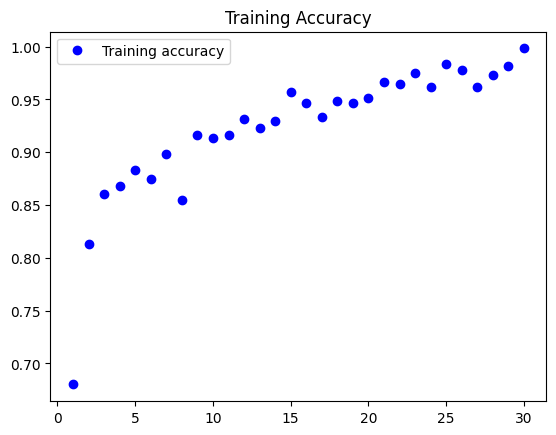

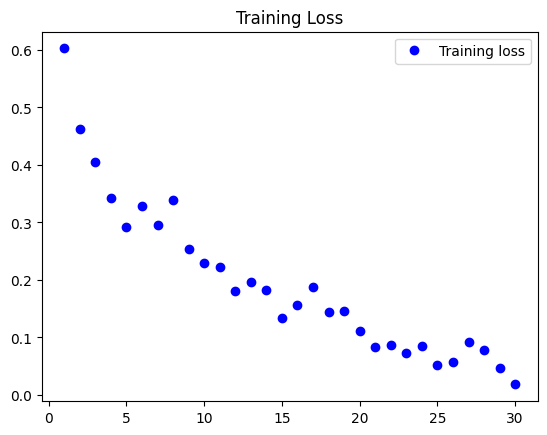

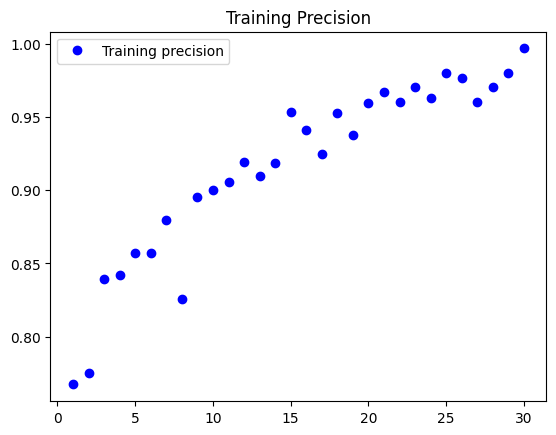

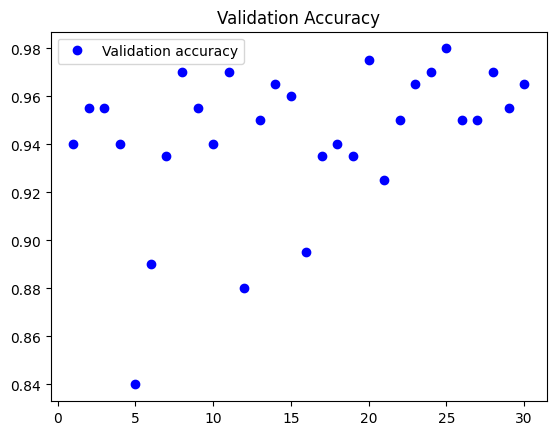

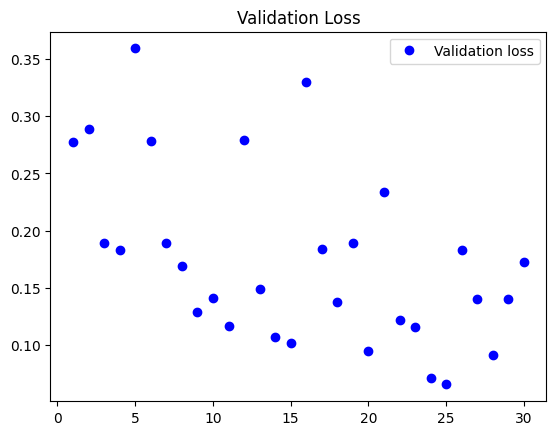

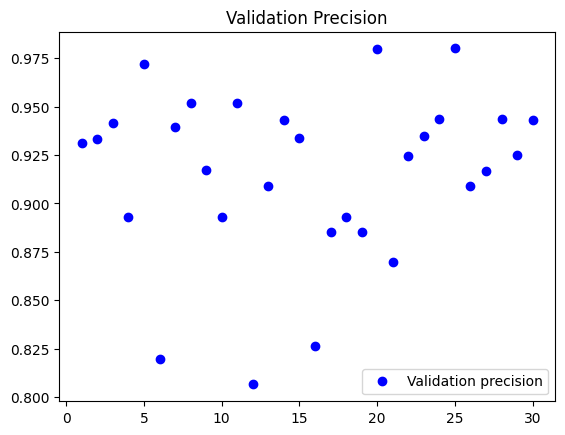

In [24]:
train_accuracy = history_increase_epochs.history["accuracy"]
train_loss = history_increase_epochs.history["loss"]
train_precision = history_increase_epochs.history["precision_2"]
val_accuracy = history_increase_epochs.history["val_accuracy"]
val_loss = history_increase_epochs.history["val_loss"]
val_precision = history_increase_epochs.history["val_precision_2"]
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, "bo", label="Training accuracy")
plt.title("Training Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, train_loss, "bo", label="Training loss")
plt.title("Training Loss")
plt.legend()
plt.show()
plt.plot(epochs, train_precision, "bo", label="Training precision")
plt.title("Training Precision")
plt.legend()
plt.show()
plt.plot(epochs, val_accuracy, "bo", label="Validation accuracy")
plt.title("Validation Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, val_loss, "bo", label="Validation loss")
plt.title("Validation Loss")
plt.legend()
plt.show()
plt.plot(epochs, val_precision, "bo", label="Validation precision")
plt.title("Validation Precision")
plt.legend()
plt.show()

<br></br>
### **Model Inference**

In [25]:
# Let's loads the best-performing model and evaluate on the test data

best_model = keras.models.load_model("base_model_checkpoint_filepath")
best_model.evaluate(test_generator)

50/50 [==============================] - 1s 16ms/step - loss: 0.1484 - accuracy: 0.9550 - precision_2: 0.9333


[0.14840058982372284, 0.9549999833106995, 0.9333333373069763]

<br></br>

**Increasing the number of epochs from 10 to 30 resulted in an increase in training accuracy from 0.9169 to 0.9983. Similarly, the validation accuracy increased from 0.94 to 0.97. As expected, the time required for training increased significantly from 3 minutes to 5 minutes due to the higher number of epochs. This indicates that the model benefited from additional training, as evidenced by the improvements in both training and validation accuracies.**

<br></br>
### **Decrease the number of layers**

In [36]:
# Define the input shape and number of classes
input_shape = (150, 150, 3)
num_classes = 2

# Start defining the model
inputs = keras.Input(shape=input_shape)
x = layers.Conv2D(32, 3, padding='same', activation='relu')(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(128, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# Adding a couple more Conv2D and MaxPooling2D layers
x = layers.Conv2D(256, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# Global Average Pooling followed by the classifier
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)  # Common dropout rate for regularization

# Output layer
outputs = layers.Dense(1, activation='sigmoid')(x)

# Finalize the model
model_decrease_layers = keras.Model(inputs=inputs, outputs=outputs)

In [37]:
# Let's compile the CNN model using binary cross_entropy as loss function and adam as optimizer
model_decrease_layers.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', keras.metrics.Precision()])

# Let's define the callbacks for Model saving and Early stopping

cb_check = keras.callbacks.ModelCheckpoint(
    filepath="decrease_layers_checkpoint_filepath",
    save_best_only=True,
    monitor="val_loss")

cb_early = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=30
)

# Let's train and validate model on the training and validation data

history_decrease_layers = model_decrease_layers.fit(train_generator, validation_data = valid_generator, epochs = 30, verbose = 1, batch_size = 8, callbacks = [cb_check, cb_early])

Epoch 1/30
150/150 [==============================] - 7s 36ms/step - loss: 0.6384 - accuracy: 0.6117 - precision_6: 0.6683 - val_loss: 0.3889 - val_accuracy: 0.8500 - val_precision_6: 0.9268
Epoch 2/30
150/150 [==============================] - 5s 31ms/step - loss: 0.5383 - accuracy: 0.8133 - precision_6: 0.7848 - val_loss: 0.2210 - val_accuracy: 0.9300 - val_precision_6: 0.9216
Epoch 3/30
150/150 [==============================] - 4s 25ms/step - loss: 0.4117 - accuracy: 0.8483 - precision_6: 0.8047 - val_loss: 0.3755 - val_accuracy: 0.8250 - val_precision_6: 0.7407
Epoch 4/30
150/150 [==============================] - 5s 31ms/step - loss: 0.3692 - accuracy: 0.8600 - precision_6: 0.8214 - val_loss: 0.1845 - val_accuracy: 0.9300 - val_precision_6: 0.9574
Epoch 5/30
150/150 [==============================] - 4s 26ms/step - loss: 0.3661 - accuracy: 0.8850 - precision_6: 0.8468 - val_loss: 0.1889 - val_accuracy: 0.9600 - val_precision_6: 0.9423
Epoch 6/30
150/150 [=========================

<br></br>
### **Model Evaluation(Precison, Recall, F1-score) - Decrease convolution layers**

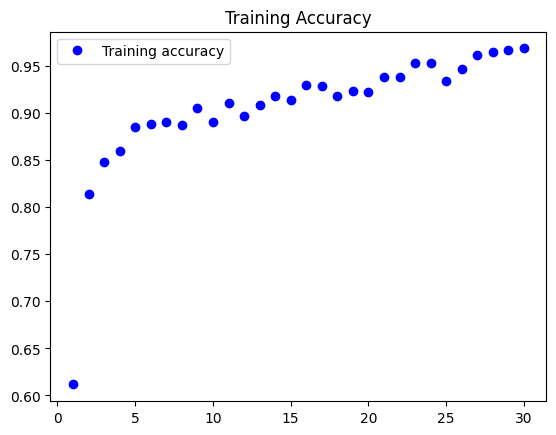

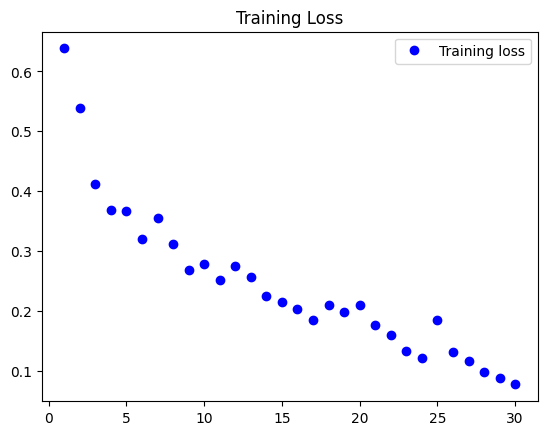

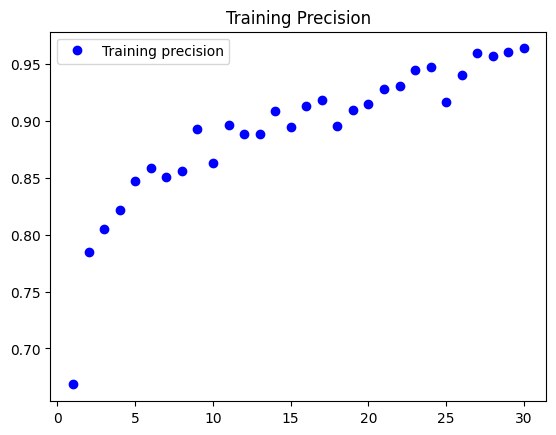

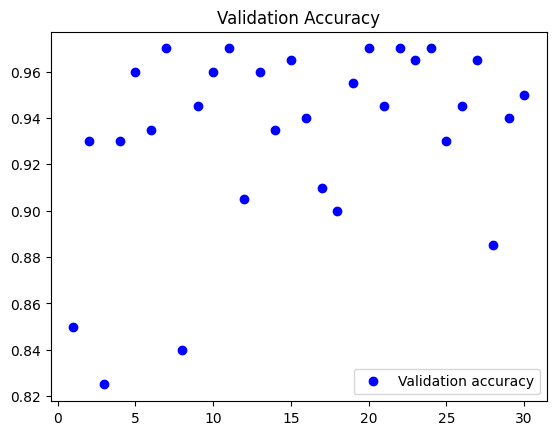

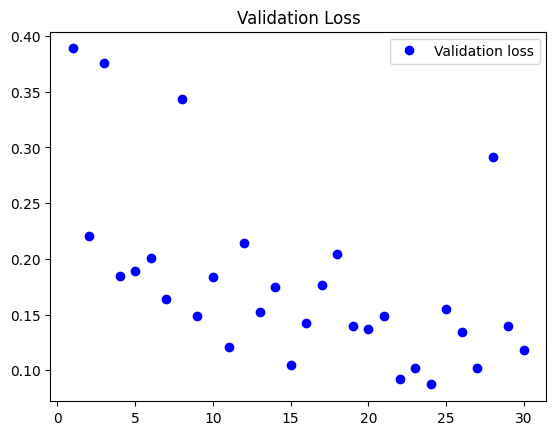

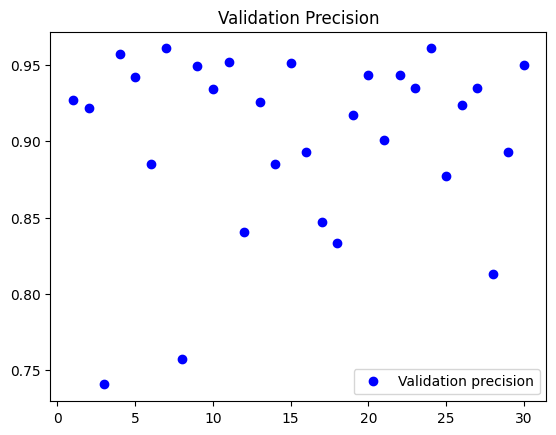

In [39]:
train_accuracy = history_decrease_layers.history["accuracy"]
train_loss = history_decrease_layers.history["loss"]
train_precision = history_decrease_layers.history["precision_6"]
val_accuracy = history_decrease_layers.history["val_accuracy"]
val_loss = history_decrease_layers.history["val_loss"]
val_precision = history_decrease_layers.history["val_precision_6"]
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, "bo", label="Training accuracy")
plt.title("Training Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, train_loss, "bo", label="Training loss")
plt.title("Training Loss")
plt.legend()
plt.show()
plt.plot(epochs, train_precision, "bo", label="Training precision")
plt.title("Training Precision")
plt.legend()
plt.show()
plt.plot(epochs, val_accuracy, "bo", label="Validation accuracy")
plt.title("Validation Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, val_loss, "bo", label="Validation loss")
plt.title("Validation Loss")
plt.legend()
plt.show()
plt.plot(epochs, val_precision, "bo", label="Validation precision")
plt.title("Validation Precision")
plt.legend()
plt.show()

<br></br>
### **Model Inference**

In [40]:
# Let's loads the best-performing model and evaluate on the test data

model = keras.models.load_model("decrease_layers_checkpoint_filepath")
model.evaluate(test_generator)

50/50 [==============================] - 1s 15ms/step - loss: 0.1241 - accuracy: 0.9400 - precision_6: 0.9000


[0.12408556789159775, 0.9399999976158142, 0.8999999761581421]

<br></br>

**Surprisingly, decreasing one convolution and pooling layers by resulted in a training accuracy of 0.9683 and a validation accuracy of 0.95. The time it took to complete training and validation for 30 epochs was almost 3 minutes. The test performance is similar to the configuration with more layers; the accuracy with fewer layers is 0.94, while the accuracy with more layers is 0.9550.**

<br></br>
### **Increase the number of convolutional filters**

In [45]:
# Define the input shape and number of classes
input_shape = (150, 150, 3)
num_classes = 2

# Start defining the model
inputs = keras.Input(shape=input_shape)
x = layers.Conv2D(32, 3, padding='same', activation='relu')(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(256, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(256, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# Adding a couple more Conv2D and MaxPooling2D layers
x = layers.Conv2D(256, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# Global Average Pooling followed by the classifier
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)  # Common dropout rate for regularization

# Output layer
outputs = layers.Dense(1, activation='sigmoid')(x)

# Finalize the model
model_increased_filters = keras.Model(inputs=inputs, outputs=outputs)

In [46]:
# Let's compile the CNN model using binary cross_entropy as loss function and adam as optimizer
model_increased_filters.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', keras.metrics.Precision()])

# Let's define the callbacks for Model saving and Early stopping

cb_check = keras.callbacks.ModelCheckpoint(
    filepath="increase_filters_checkpoint_filepath",
    save_best_only=True,
    monitor="val_loss")

cb_early = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=30
)

# Let's train and validate model on the training and validation data

history_increased_filters = model_increased_filters.fit(train_generator, validation_data = valid_generator, epochs = 30, verbose = 1, batch_size = 8, callbacks = [cb_check, cb_early])

Epoch 1/30
150/150 [==============================] - 7s 35ms/step - loss: 0.6311 - accuracy: 0.6733 - precision_9: 0.6711 - val_loss: 0.3597 - val_accuracy: 0.9000 - val_precision_9: 0.8448
Epoch 2/30
150/150 [==============================] - 4s 25ms/step - loss: 0.5611 - accuracy: 0.7550 - precision_9: 0.7029 - val_loss: 0.6817 - val_accuracy: 0.5150 - val_precision_9: 0.5076
Epoch 3/30
150/150 [==============================] - 4s 26ms/step - loss: 0.6183 - accuracy: 0.7517 - precision_9: 0.6921 - val_loss: 0.4809 - val_accuracy: 0.8200 - val_precision_9: 0.7353
Epoch 4/30
150/150 [==============================] - 5s 35ms/step - loss: 0.5312 - accuracy: 0.7850 - precision_9: 0.7221 - val_loss: 0.2999 - val_accuracy: 0.9100 - val_precision_9: 0.9457
Epoch 5/30
150/150 [==============================] - 5s 33ms/step - loss: 0.4459 - accuracy: 0.8367 - precision_9: 0.7953 - val_loss: 0.2461 - val_accuracy: 0.9050 - val_precision_9: 0.8403
Epoch 6/30
150/150 [=========================

<br></br>
### **Model Evaluation(Precison, Recall, F1-score) - Decrease convolution filters**

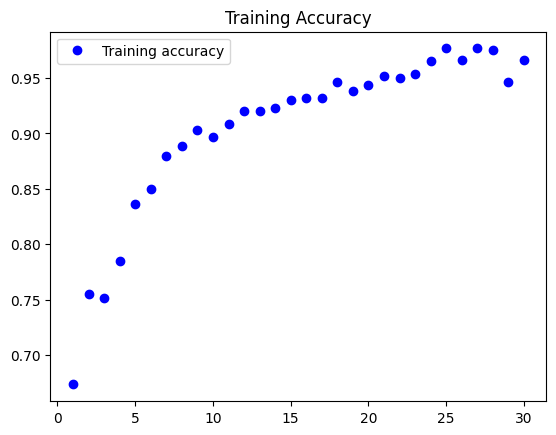

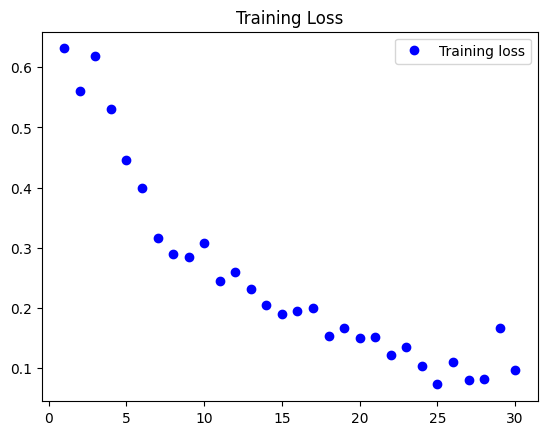

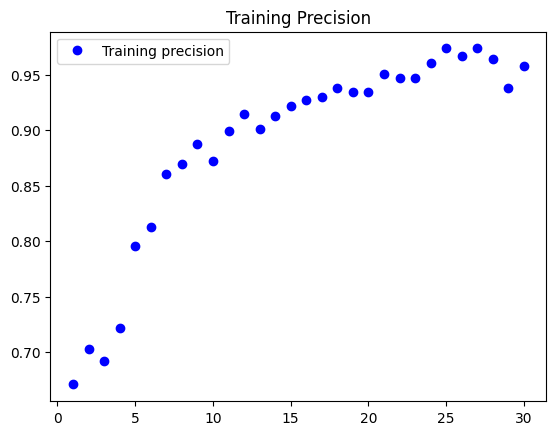

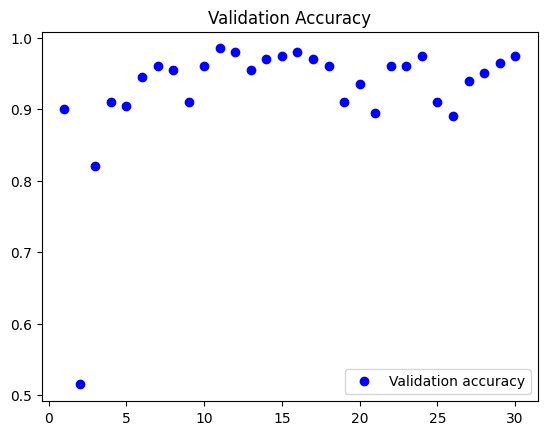

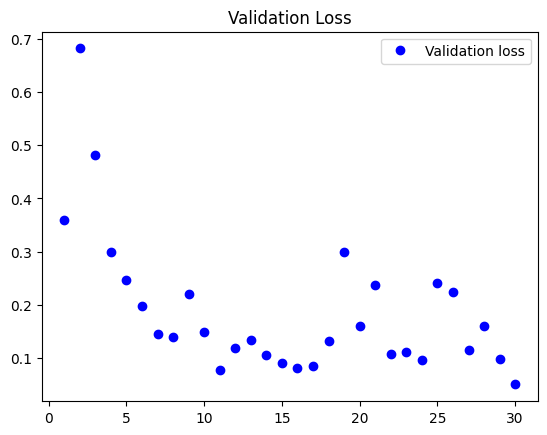

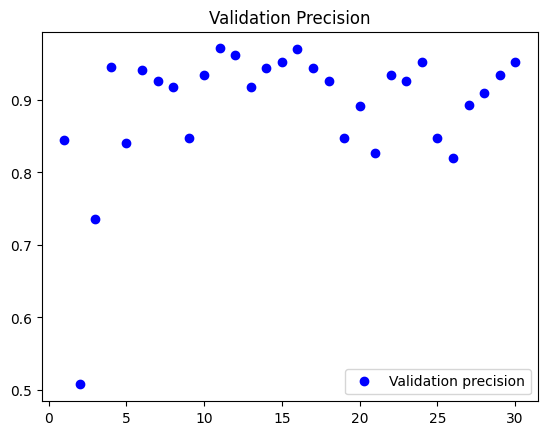

In [49]:
train_accuracy = history_increased_filters.history["accuracy"]
train_loss = history_increased_filters.history["loss"]
train_precision = history_increased_filters.history["precision_9"]
val_accuracy = history_increased_filters.history["val_accuracy"]
val_loss = history_increased_filters.history["val_loss"]
val_precision = history_increased_filters.history["val_precision_9"]
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, "bo", label="Training accuracy")
plt.title("Training Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, train_loss, "bo", label="Training loss")
plt.title("Training Loss")
plt.legend()
plt.show()
plt.plot(epochs, train_precision, "bo", label="Training precision")
plt.title("Training Precision")
plt.legend()
plt.show()
plt.plot(epochs, val_accuracy, "bo", label="Validation accuracy")
plt.title("Validation Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, val_loss, "bo", label="Validation loss")
plt.title("Validation Loss")
plt.legend()
plt.show()
plt.plot(epochs, val_precision, "bo", label="Validation precision")
plt.title("Validation Precision")
plt.legend()
plt.show()

<br></br>
### **Model Inference**

In [50]:
# Let's loads the best-performing model and evaluate on the test data

model = keras.models.load_model("increase_filters_checkpoint_filepath")
model.evaluate(test_generator)

50/50 [==============================] - 1s 17ms/step - loss: 0.1671 - accuracy: 0.9450 - precision_9: 0.9009


[0.1671462506055832, 0.9449999928474426, 0.9009009003639221]

<br></br>

**Surprisingly, increasing the number of convolution filters from 128 to 256 in two convolution layers resulted in a training accuracy of 0.9667 and a validation accuracy of 0.9750. The time it took to complete training and validation for 30 epochs was close to 3 minutes. The test performance is same to the configuration with more filters; the accuracy with fewer filters is 0.9450, while the accuracy with base configuration is 0.9550.**

<br></br>
### **Decrease the image size**

In [51]:
# Define the input shape and number of classes
input_shape = (100, 100, 3)
num_classes = 2

# Start defining the model
inputs = keras.Input(shape=input_shape)
x = layers.Conv2D(32, 3, padding='same', activation='relu')(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(256, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(256, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# Adding a couple more Conv2D and MaxPooling2D layers
x = layers.Conv2D(256, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# Global Average Pooling followed by the classifier
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)  # Common dropout rate for regularization

# Output layer
outputs = layers.Dense(1, activation='sigmoid')(x)

# Finalize the model
model_decreased_image_size = keras.Model(inputs=inputs, outputs=outputs)

In [52]:
# Let's compile the CNN model using binary cross_entropy as loss function and adam as optimizer
model_decreased_image_size.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', keras.metrics.Precision()])

# Let's define the callbacks for Model saving and Early stopping

cb_check = keras.callbacks.ModelCheckpoint(
    filepath="decrease_image_checkpoint_filepath",
    save_best_only=True,
    monitor="val_loss")

cb_early = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=30
)

# Let's train and validate model on the training and validation data

history_decreased_image_size = model_decreased_image_size.fit(train_generator, validation_data = valid_generator, epochs = 30, verbose = 1, batch_size = 8, callbacks = [cb_check, cb_early])

Epoch 1/30
150/150 [==============================] - 7s 35ms/step - loss: 0.6771 - accuracy: 0.5433 - precision_10: 0.5684 - val_loss: 0.4984 - val_accuracy: 0.8500 - val_precision_10: 0.9487
Epoch 2/30
150/150 [==============================] - 4s 25ms/step - loss: 0.6645 - accuracy: 0.6917 - precision_10: 0.6448 - val_loss: 0.6203 - val_accuracy: 0.8000 - val_precision_10: 0.8947
Epoch 3/30
150/150 [==============================] - 5s 33ms/step - loss: 0.5489 - accuracy: 0.7933 - precision_10: 0.7588 - val_loss: 0.2703 - val_accuracy: 0.9100 - val_precision_10: 0.8475
Epoch 4/30
150/150 [==============================] - 4s 25ms/step - loss: 0.4003 - accuracy: 0.8517 - precision_10: 0.8187 - val_loss: 0.3547 - val_accuracy: 0.8450 - val_precision_10: 0.7674
Epoch 5/30
150/150 [==============================] - 5s 33ms/step - loss: 0.3474 - accuracy: 0.8750 - precision_10: 0.8483 - val_loss: 0.2459 - val_accuracy: 0.9100 - val_precision_10: 0.8534
Epoch 6/30
150/150 [===============

<br></br>
### **Model Evaluation(Precison, Recall, F1-score) - Decreased Image Size**

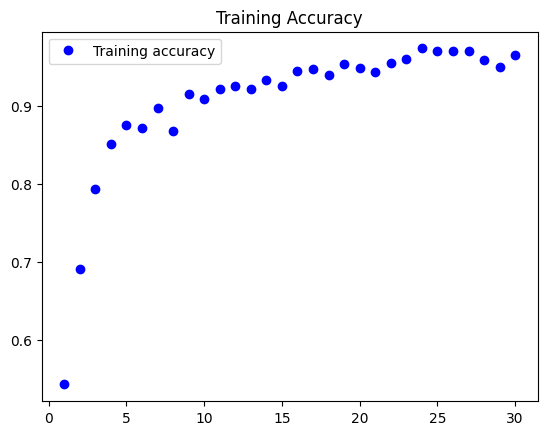

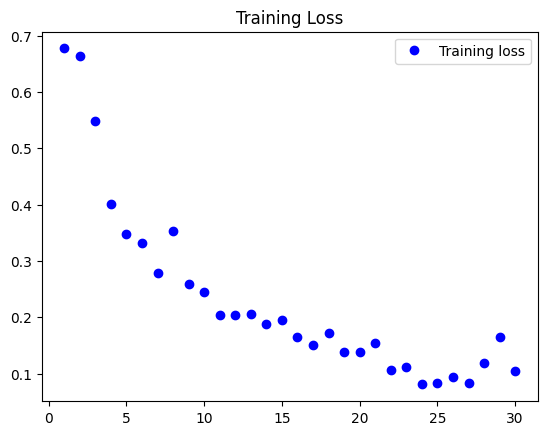

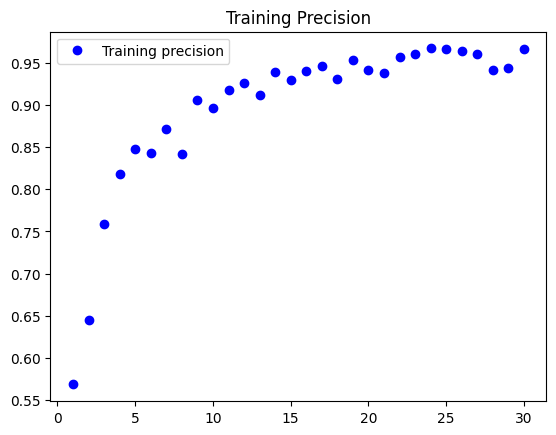

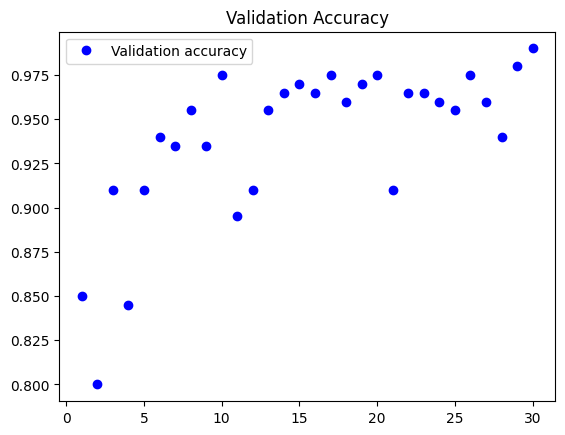

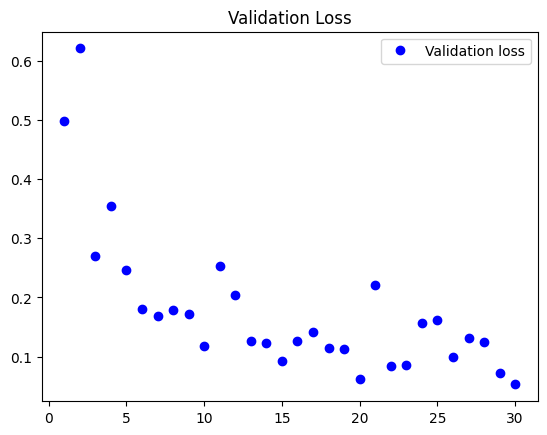

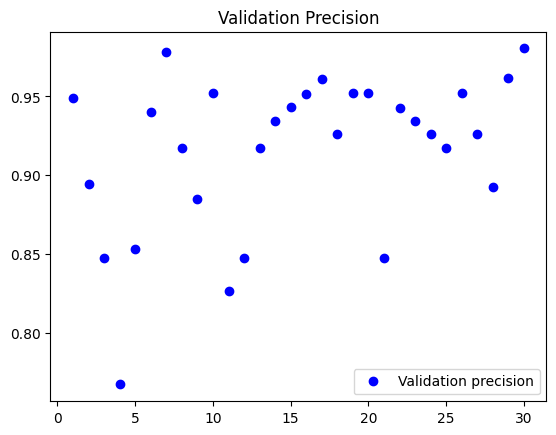

In [54]:
train_accuracy = history_decreased_image_size.history["accuracy"]
train_loss = history_decreased_image_size.history["loss"]
train_precision = history_decreased_image_size.history["precision_10"]
val_accuracy = history_decreased_image_size.history["val_accuracy"]
val_loss = history_decreased_image_size.history["val_loss"]
val_precision = history_decreased_image_size.history["val_precision_10"]
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, "bo", label="Training accuracy")
plt.title("Training Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, train_loss, "bo", label="Training loss")
plt.title("Training Loss")
plt.legend()
plt.show()
plt.plot(epochs, train_precision, "bo", label="Training precision")
plt.title("Training Precision")
plt.legend()
plt.show()
plt.plot(epochs, val_accuracy, "bo", label="Validation accuracy")
plt.title("Validation Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, val_loss, "bo", label="Validation loss")
plt.title("Validation Loss")
plt.legend()
plt.show()
plt.plot(epochs, val_precision, "bo", label="Validation precision")
plt.title("Validation Precision")
plt.legend()
plt.show()

<br></br>
### **Model Inference**

In [55]:
# Let's loads the best-performing model and evaluate on the test data

model = keras.models.load_model("decrease_image_checkpoint_filepath")
model.evaluate(test_generator)

50/50 [==============================] - 1s 16ms/step - loss: 0.1189 - accuracy: 0.9600 - precision_10: 0.9423


[0.11893752962350845, 0.9599999785423279, 0.942307710647583]

<br></br>

**Decreasing the size of input images by almost 40% resulted in a training accuracy of 0.9650 and a validation accuracy of 0.99. The time it took to complete training and validation for 30 epochs was close to 3 minutes. The test performance is almost identical to the configuration with larger input sizes; the accuracy with the smaller image size is 0.96, while the accuracy with the larger image size is 0.9550.**

<br></br>

#### Decreasing the image size and using the base configuration model outperformed all others in the experiments. Let's load the best model and continue exploring larger network architectures..

In [56]:
# Let's load the best performing model

best_model = keras.models.load_model("decrease_image_checkpoint_filepath")

<br></br>
### **Powerful Architecture - DenseNet**

In [63]:
# Data Augmentation Layer

data_augmentation = keras.Sequential(
    [
        layers.RandomRotation(0.2),
        layers.RandomZoom(0.19)
    ]
)


In [64]:
def densenet(input_shape, n_classes, filters=32):
    def bn_rl_conv(x, filters, kernel=1, strides=1):
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        x = layers.Conv2D(filters, kernel, strides=strides, padding='same')(x)
        return x

    def dense_block(x, repetitions):
        for _ in range(repetitions):
            y = bn_rl_conv(x, 4 * filters)
            y = bn_rl_conv(y, filters, 3)
            x = layers.concatenate([x, y])
        return x

    def transition_layer(x):
        x = bn_rl_conv(x, keras.backend.int_shape(x)[-1] // 2)
        x = layers.AvgPool2D(2, strides=2, padding='same')(x)
        return x

    input = keras.Input(shape=(150, 150, 3))
    x = data_augmentation(input)
    x = layers.Rescaling(1./255)(input)
    x = layers.Conv2D(7, 3, strides = 2, padding = 'same')(input)
    x = layers.MaxPool2D(4, strides = 2, padding = 'same')(x)

    for repetitions in [6, 12, 24, 16]:
        d = dense_block(x, repetitions)
        x = transition_layer(d)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.5)(x)  # Updated dropout rate to a more typical value
    outputs = layers.Dense(1, activation="sigmoid")(x)  # Changed from 1 to n_classes

    model = keras.Model(inputs=input, outputs=outputs)
    return model

# Example usage
input_shape = (150, 150, 3)
n_classes = 2
dense_net_model = densenet(input_shape, n_classes)

In [65]:
# Let's compile the CNN model using binary cross_entropy as loss function and adam as optimizer
dense_net_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', keras.metrics.Precision()])

# Let's define the callbacks for Model saving and Early stopping

cb_check = keras.callbacks.ModelCheckpoint(
    filepath="densenet_checkpoint_filepath",
    save_best_only=True,
    monitor="val_loss")

cb_early = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=30
)

# Let's train and validate model on the training and validation data

history_densenet = dense_net_model.fit(train_generator, validation_data = valid_generator, epochs = 50, verbose = 1, batch_size = 8, callbacks = [cb_check, cb_early])

Epoch 1/50
150/150 [==============================] - 154s 471ms/step - loss: 1.0819 - accuracy: 0.6383 - precision_14: 0.6301 - val_loss: 1.0697 - val_accuracy: 0.5000 - val_precision_14: 0.5000
Epoch 2/50
150/150 [==============================] - 69s 459ms/step - loss: 0.7669 - accuracy: 0.7067 - precision_14: 0.6902 - val_loss: 0.8574 - val_accuracy: 0.5000 - val_precision_14: 0.5000
Epoch 3/50
150/150 [==============================] - 15s 100ms/step - loss: 0.6293 - accuracy: 0.7667 - precision_14: 0.7516 - val_loss: 13.2370 - val_accuracy: 0.5850 - val_precision_14: 0.5464
Epoch 4/50
150/150 [==============================] - 15s 102ms/step - loss: 0.5938 - accuracy: 0.7483 - precision_14: 0.7350 - val_loss: 0.9348 - val_accuracy: 0.5700 - val_precision_14: 0.5376
Epoch 5/50
150/150 [==============================] - 15s 102ms/step - loss: 0.5425 - accuracy: 0.7850 - precision_14: 0.7680 - val_loss: 5.3569 - val_accuracy: 0.6000 - val_precision_14: 0.5568
Epoch 6/50
150/150 [===

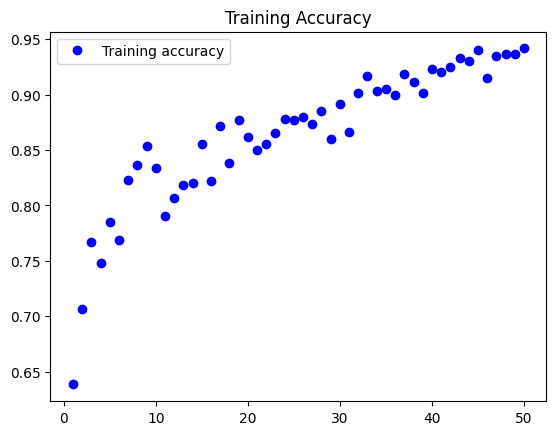

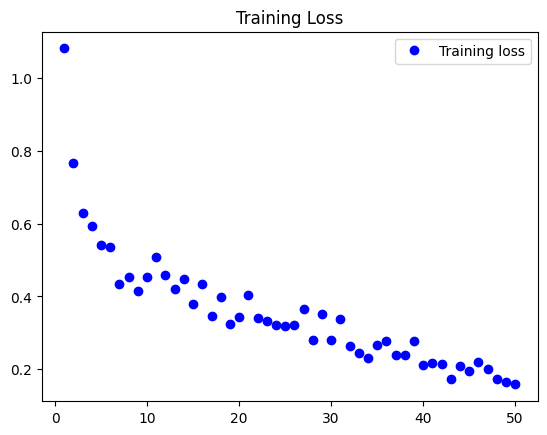

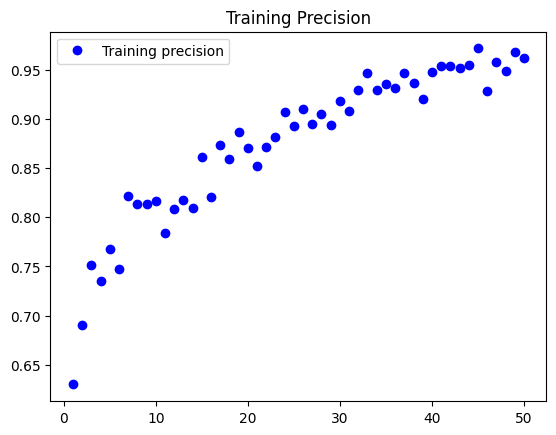

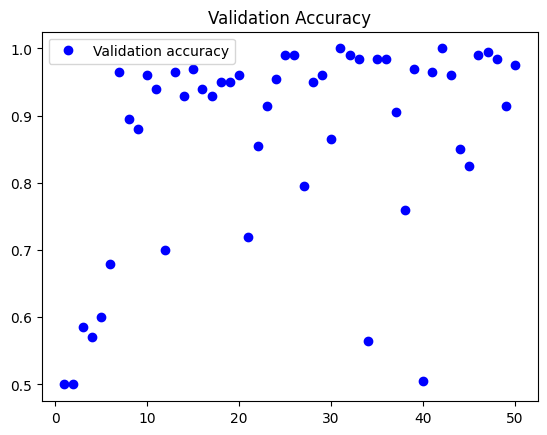

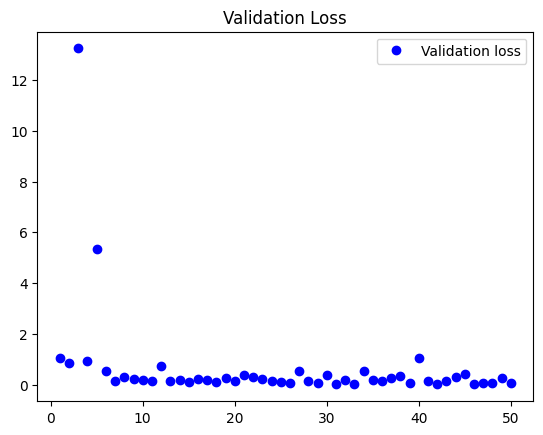

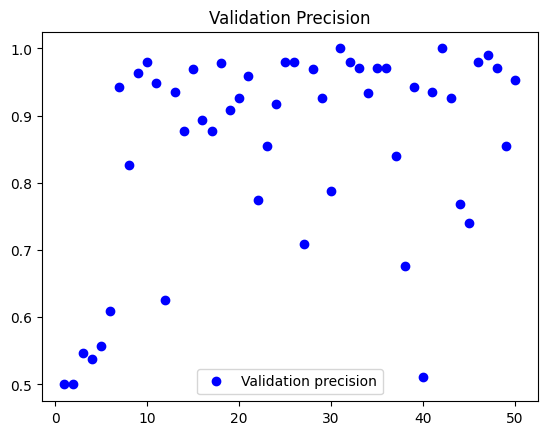

In [66]:
train_accuracy = history_densenet.history["accuracy"]
train_loss = history_densenet.history["loss"]
train_precision = history_densenet.history["precision_14"]
val_accuracy = history_densenet.history["val_accuracy"]
val_loss = history_densenet.history["val_loss"]
val_precision = history_densenet.history["val_precision_14"]
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, "bo", label="Training accuracy")
plt.title("Training Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, train_loss, "bo", label="Training loss")
plt.title("Training Loss")
plt.legend()
plt.show()
plt.plot(epochs, train_precision, "bo", label="Training precision")
plt.title("Training Precision")
plt.legend()
plt.show()
plt.plot(epochs, val_accuracy, "bo", label="Validation accuracy")
plt.title("Validation Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, val_loss, "bo", label="Validation loss")
plt.title("Validation Loss")
plt.legend()
plt.show()
plt.plot(epochs, val_precision, "bo", label="Validation precision")
plt.title("Validation Precision")
plt.legend()
plt.show()

<br></br>
### **Model Inference**

In [67]:
# Let's loads the best-performing model and evaluate on the test data

model = keras.models.load_model("densenet_checkpoint_filepath")
model.evaluate(test_generator)

50/50 [==============================] - 4s 20ms/step - loss: 0.0443 - accuracy: 0.9900 - precision_14: 0.9804


[0.04431105777621269, 0.9900000095367432, 0.9803921580314636]

<br></br>

**Using the DenseNet model architecture to finetune on a political meme dataset resulted in a training accuracy of 0.9417 and a validation accuracy of 0.9750. The time it took to complete training and validation for 30 epochs was close to 22 minutes. The test performance improved compared to the base configuration; the accuracy with DenseNet architecture is 0.99, while the accuracy with the base configuration is 0.9550.**

<br></br>
### **Powerful Architecture - ResNet**

In [80]:
def resnet_block(input_tensor, filters, kernel_size=3, strides=1):
    """A typical ResNet block with shortcut connections."""
    # Shortcut connection to be added back to the main path
    shortcut = input_tensor
    if input_tensor.shape[-1] != filters or strides != 1:
        shortcut = layers.Conv2D(filters, 1, strides=strides, padding='same')(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    # First convolution layer of the block
    x = layers.Conv2D(filters, kernel_size, strides=strides, padding='same')(input_tensor)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    # Second convolution layer of the block
    x = layers.Conv2D(filters, kernel_size, padding='same')(x)
    x = layers.BatchNormalization()(x)

    # Adding back the shortcut connection to the main path before the final ReLU
    x = layers.Add()([x, shortcut])
    x = layers.Activation('relu')(x)
    return x

def build_resnet(input_shape, n_classes, block_config):
    """Builds a custom ResNet-like architecture using the given block configuration."""
    inputs = keras.Input(shape=input_shape)
    x = data_augmentation(inputs)
    x = layers.Rescaling(1./255)(inputs)
    x = layers.Conv2D(64, 7, strides=2, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D(3, strides=2, padding='same')(x)

    # Process each block configuration
    for num_filters, repetitions, stride in block_config:
        for _ in range(repetitions):
            x = resnet_block(x, num_filters, strides=stride)
            stride = 1  # Apply stride only to the first layer in the block

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)

    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

# Example usage
input_shape = (150, 150, 3)
n_classes = 2
block_config = [(64, 2, 1), (128, 2, 2), (256, 2, 2), (512, 2, 2)]  # (filters, repetitions, stride)
resnet_model = build_resnet(input_shape, n_classes, block_config)

In [81]:
# Let's compile the CNN model using binary cross_entropy as loss function and adam as optimizer
resnet_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', keras.metrics.Precision()])

# Let's define the callbacks for Model saving and Early stopping

cb_check = keras.callbacks.ModelCheckpoint(
    filepath="resnet_checkpoint_filepath",
    save_best_only=True,
    monitor="val_loss")

cb_early = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=30
)

# Let's train and validate model on the training and validation data

history_resnet = resnet_model.fit(train_generator, validation_data = valid_generator, epochs = 50, verbose = 1, batch_size = 8, callbacks = [cb_check, cb_early])

Epoch 1/50
150/150 [==============================] - 23s 83ms/step - loss: 1.0721 - accuracy: 0.5333 - precision_20: 0.5321 - val_loss: 0.7139 - val_accuracy: 0.5000 - val_precision_20: 0.0000e+00
Epoch 2/50
150/150 [==============================] - 5s 30ms/step - loss: 0.7597 - accuracy: 0.6367 - precision_20: 0.6404 - val_loss: 0.9335 - val_accuracy: 0.5000 - val_precision_20: 0.5000
Epoch 3/50
150/150 [==============================] - 4s 27ms/step - loss: 0.7598 - accuracy: 0.6150 - precision_20: 0.6082 - val_loss: 17.2574 - val_accuracy: 0.5100 - val_precision_20: 1.0000
Epoch 4/50
150/150 [==============================] - 4s 28ms/step - loss: 0.7276 - accuracy: 0.6133 - precision_20: 0.5971 - val_loss: 8.3056 - val_accuracy: 0.5100 - val_precision_20: 0.5059
Epoch 5/50
150/150 [==============================] - 4s 28ms/step - loss: 0.8275 - accuracy: 0.4933 - precision_20: 0.4939 - val_loss: 1.3000 - val_accuracy: 0.5700 - val_precision_20: 0.5795
Epoch 6/50
150/150 [=========

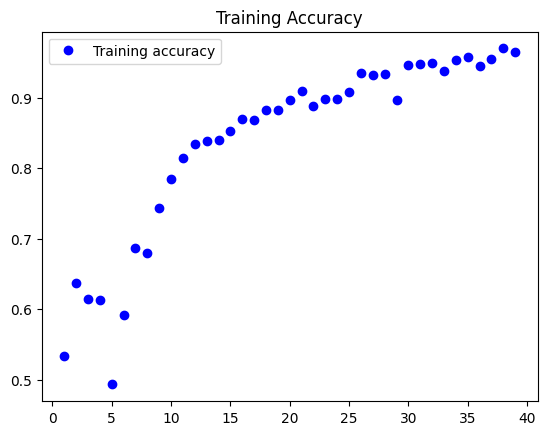

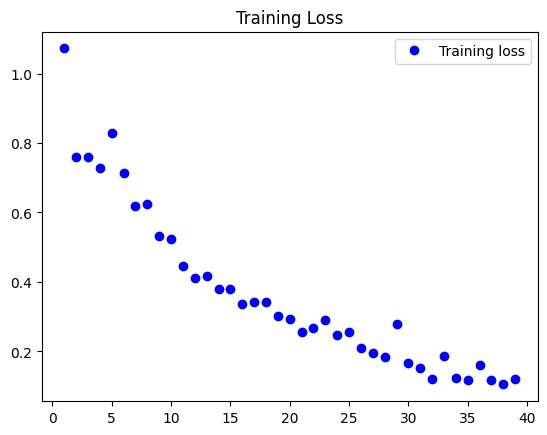

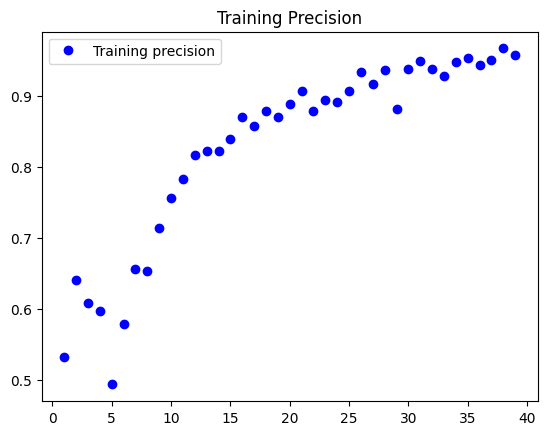

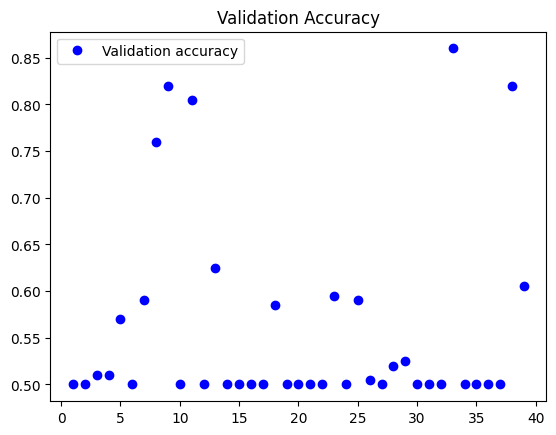

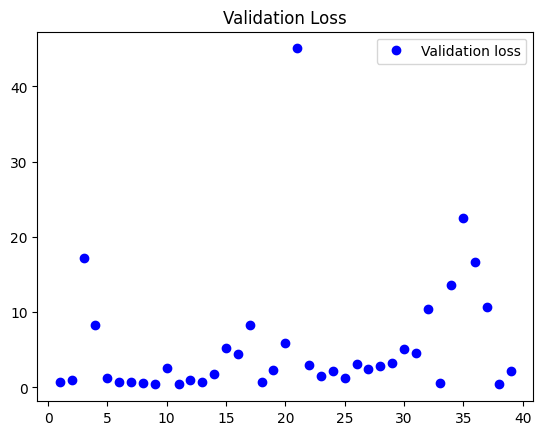

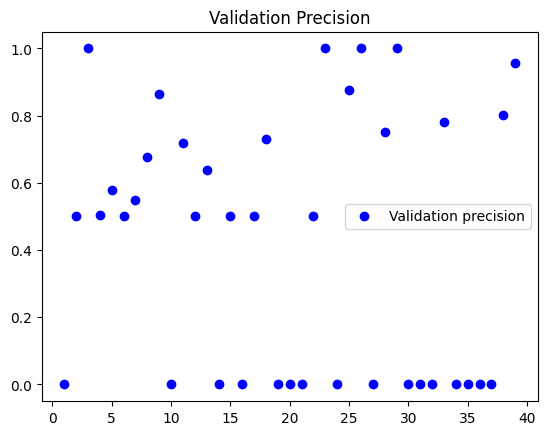

In [84]:
train_accuracy = history_resnet.history["accuracy"]
train_loss = history_resnet.history["loss"]
train_precision = history_resnet.history["precision_20"]
val_accuracy = history_resnet.history["val_accuracy"]
val_loss = history_resnet.history["val_loss"]
val_precision = history_resnet.history["val_precision_20"]
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, "bo", label="Training accuracy")
plt.title("Training Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, train_loss, "bo", label="Training loss")
plt.title("Training Loss")
plt.legend()
plt.show()
plt.plot(epochs, train_precision, "bo", label="Training precision")
plt.title("Training Precision")
plt.legend()
plt.show()
plt.plot(epochs, val_accuracy, "bo", label="Validation accuracy")
plt.title("Validation Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, val_loss, "bo", label="Validation loss")
plt.title("Validation Loss")
plt.legend()
plt.show()
plt.plot(epochs, val_precision, "bo", label="Validation precision")
plt.title("Validation Precision")
plt.legend()
plt.show()

<br></br>
### **Model Inference**

In [85]:
# Let's loads the best-performing model and evaluate on the test data

model = keras.models.load_model("resnet_checkpoint_filepath")
model.evaluate(test_generator)

50/50 [==============================] - 2s 17ms/step - loss: 0.4244 - accuracy: 0.7500 - precision_20: 0.7907


[0.4244219958782196, 0.75, 0.7906976938247681]

<br></br>

**Using the ResNet architecture to fine-tune on the political memes dataset resulted in a training accuracy of 0.97 and a validation accuracy of 0.82. The training and validation for 50 epochs took approximately 3 minutes to complete. However, the test performance decreased compared to the base configuration; the accuracy with the ResNet architecture is 0.75, while the accuracy with the base configuration is 0.96. The model overfitted, and most of the time the validation accuracy hovered around 0.50 over 50 epochs, although occasionally it exceeded 0.75. The combination of a small dataset and a large network architecture is likely causing the lower validation accuracies.**

<br></br>
### **Pretrained Model - ResNet50**

In [91]:
# Define the input shape and number of classes
input_shape = (150, 150, 3)
num_classes = 2

def build_pretrained_resnet(input_shape, n_classes):
    base_model = keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=input_shape)
    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    predictions = layers.Dense(1, activation='sigmoid')(x)

    model = keras.models.Model(inputs=base_model.input, outputs=predictions)

    for layer in base_model.layers[:3]:
        layer.trainable = False

    return model

# Specify the input shape and number of classes
resnet_pretrained_model = build_pretrained_resnet(input_shape, num_classes)

In [92]:
# Let's compile the CNN model using binary cross_entropy as loss function and adam as optimizer
resnet_pretrained_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', keras.metrics.Precision()])

# Let's define the callbacks for Model saving and Early stopping

cb_check = keras.callbacks.ModelCheckpoint(
    filepath="resnet_pretrained_checkpoint_filepath",
    save_best_only=True,
    monitor="val_loss")

cb_early = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=30
)

# Let's train and validate model on the training and validation data

history_pretrained_resnet = resnet_pretrained_model.fit(train_generator, validation_data = valid_generator, epochs = 50, verbose = 1, batch_size = 8, callbacks = [cb_check, cb_early])

Epoch 1/50
150/150 [==============================] - 62s 198ms/step - loss: 0.8536 - accuracy: 0.7517 - precision_23: 0.7227 - val_loss: 4.4361 - val_accuracy: 0.5000 - val_precision_23: 0.0000e+00
Epoch 2/50
150/150 [==============================] - 30s 200ms/step - loss: 0.4480 - accuracy: 0.8433 - precision_23: 0.8480 - val_loss: 0.7048 - val_accuracy: 0.5000 - val_precision_23: 0.5000
Epoch 3/50
150/150 [==============================] - 30s 203ms/step - loss: 0.4791 - accuracy: 0.7917 - precision_23: 0.7986 - val_loss: 0.6931 - val_accuracy: 0.5000 - val_precision_23: 0.5000
Epoch 4/50
150/150 [==============================] - 8s 56ms/step - loss: 0.4349 - accuracy: 0.8317 - precision_23: 0.8220 - val_loss: 0.7118 - val_accuracy: 0.4750 - val_precision_23: 0.3529
Epoch 5/50
150/150 [==============================] - 8s 52ms/step - loss: 0.4108 - accuracy: 0.8583 - precision_23: 0.8694 - val_loss: 0.7156 - val_accuracy: 0.5000 - val_precision_23: 0.0000e+00
Epoch 6/50
150/150 [=

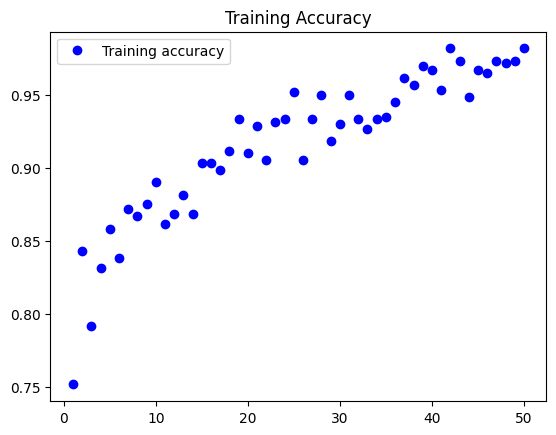

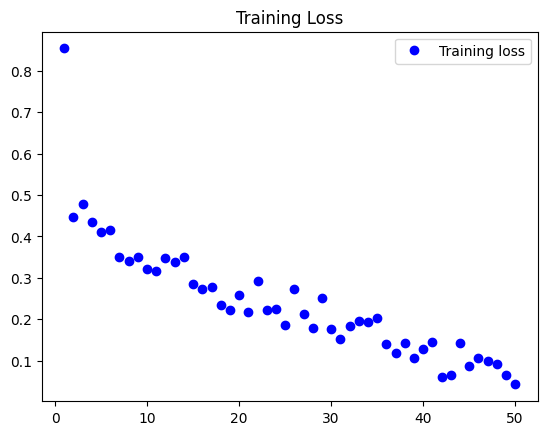

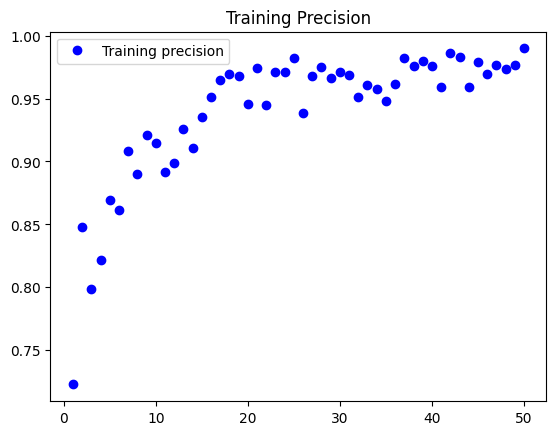

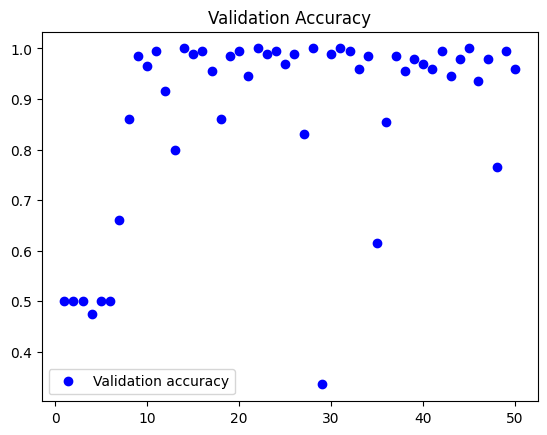

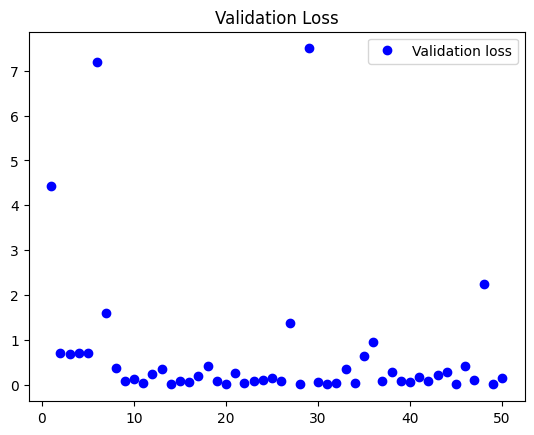

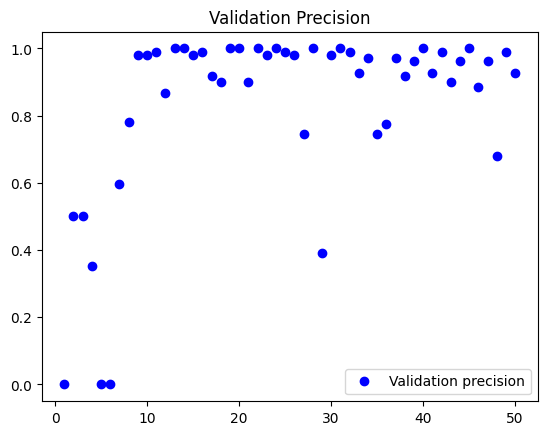

In [93]:
train_accuracy = history_pretrained_resnet.history["accuracy"]
train_loss = history_pretrained_resnet.history["loss"]
train_precision = history_pretrained_resnet.history["precision_23"]
val_accuracy = history_pretrained_resnet.history["val_accuracy"]
val_loss = history_pretrained_resnet.history["val_loss"]
val_precision = history_pretrained_resnet.history["val_precision_23"]
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, "bo", label="Training accuracy")
plt.title("Training Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, train_loss, "bo", label="Training loss")
plt.title("Training Loss")
plt.legend()
plt.show()
plt.plot(epochs, train_precision, "bo", label="Training precision")
plt.title("Training Precision")
plt.legend()
plt.show()
plt.plot(epochs, val_accuracy, "bo", label="Validation accuracy")
plt.title("Validation Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, val_loss, "bo", label="Validation loss")
plt.title("Validation Loss")
plt.legend()
plt.show()
plt.plot(epochs, val_precision, "bo", label="Validation precision")
plt.title("Validation Precision")
plt.legend()
plt.show()

<br></br>
### **Model Inference**

In [94]:
# Let's loads the best-performing model and evaluate on the test data

model = keras.models.load_model("resnet_pretrained_checkpoint_filepath")
model.evaluate(test_generator)

50/50 [==============================] - 2s 18ms/step - loss: 0.0462 - accuracy: 0.9850 - precision_23: 0.9802


[0.04623214900493622, 0.9850000143051147, 0.9801980257034302]

<br></br>

****Using the ResNet50 pre-trained model architecture and after fine-tuning on the political meme dataset for 100 epochs, we achieved a training accuracy of 0.9765 and a validation accuracy of 0.9950. The validation accuracy was stuck at 0.50 for the initial 10 epochs, but it increased thereafter. The total time it took to fine-tune the ResNet50 was 10 minutes. However, the test performance increased compared to the base configuration; the accuracy with the ResNet pretrained weights and finetuning is 0.9850, while the accuracy with the base configuration is 0.96.****

<br></br>
### **Pretrained Model - VGG16**

In [113]:
from keras.applications.vgg16 import preprocess_input

def build_pretrained_vgg16(input_shape, n_classes):
    inputs = keras.Input(shape=input_shape)
    x = preprocess_input(inputs)

    # Load the VGG16 model, pre-trained on ImageNet data
    base_model = keras.applications.VGG16(include_top=False, weights='imagenet', input_tensor=x)
    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    predictions = layers.Dense(1, activation='sigmoid')(x)  # Use 'sigmoid' for binary output

    model = keras.models.Model(inputs=base_model.input, outputs=predictions)

    # Freeze the first few layers to prevent them from being updated during the first phase of training
    for layer in base_model.layers[:7]:
        layer.trainable = False

    return model

# Specify the input shape and number of classes
vgg16_pretrained_model = build_pretrained_vgg16(input_shape, num_classes)

In [114]:
# Let's compile the CNN model using binary cross_entropy as loss function and adam as optimizer
vgg16_pretrained_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', keras.metrics.Precision()])

# Let's define the callbacks for Model saving and Early stopping

cb_check = keras.callbacks.ModelCheckpoint(
    filepath="vgg_pretrained_checkpoint_filepath",
    save_best_only=True,
    monitor="val_loss")

cb_early = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=30
)

# Let's train and validate model on the training and validation data

history_vgg_pretrained = vgg16_pretrained_model.fit(train_generator, validation_data = valid_generator, epochs = 50, verbose = 1, batch_size = 8, callbacks = [cb_check, cb_early])

Epoch 1/50
150/150 [==============================] - 13s 64ms/step - loss: 1.7640 - accuracy: 0.4900 - precision_33: 0.4810 - val_loss: 0.6932 - val_accuracy: 0.5000 - val_precision_33: 0.0000e+00
Epoch 2/50
150/150 [==============================] - 4s 28ms/step - loss: 0.6940 - accuracy: 0.4917 - precision_33: 0.4954 - val_loss: 0.6932 - val_accuracy: 0.5000 - val_precision_33: 0.5000
Epoch 3/50
150/150 [==============================] - 6s 42ms/step - loss: 0.6933 - accuracy: 0.4983 - precision_33: 0.4991 - val_loss: 0.6931 - val_accuracy: 0.5000 - val_precision_33: 0.5000
Epoch 4/50
150/150 [==============================] - 7s 41ms/step - loss: 0.6934 - accuracy: 0.4783 - precision_33: 0.4539 - val_loss: 0.6931 - val_accuracy: 0.5000 - val_precision_33: 0.5000
Epoch 5/50
150/150 [==============================] - 4s 28ms/step - loss: 0.6935 - accuracy: 0.4833 - precision_33: 0.4806 - val_loss: 0.6932 - val_accuracy: 0.5000 - val_precision_33: 0.0000e+00
Epoch 6/50
150/150 [======

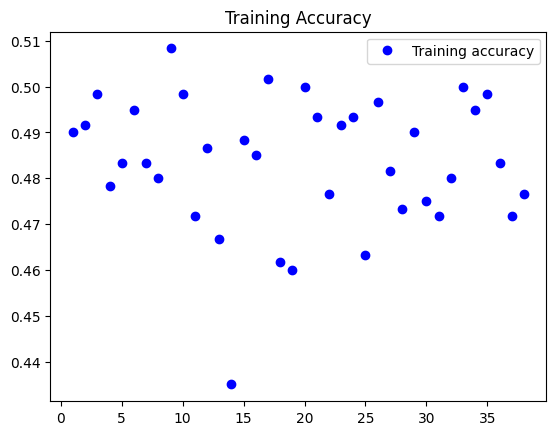

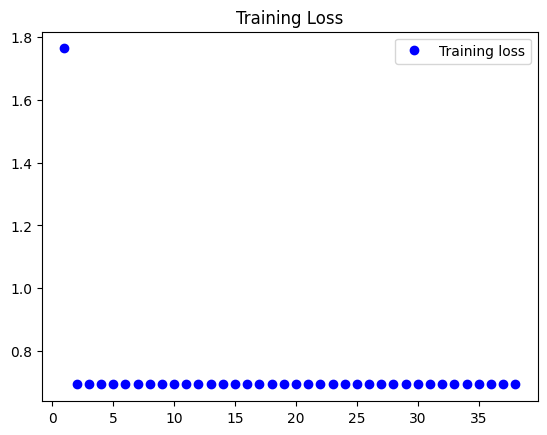

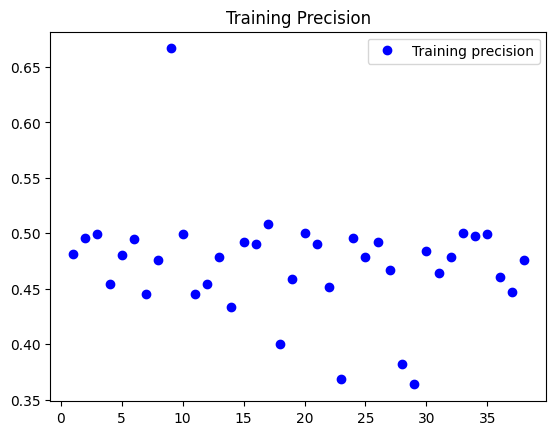

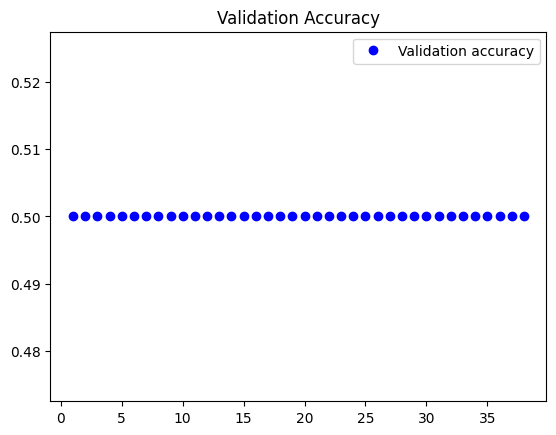

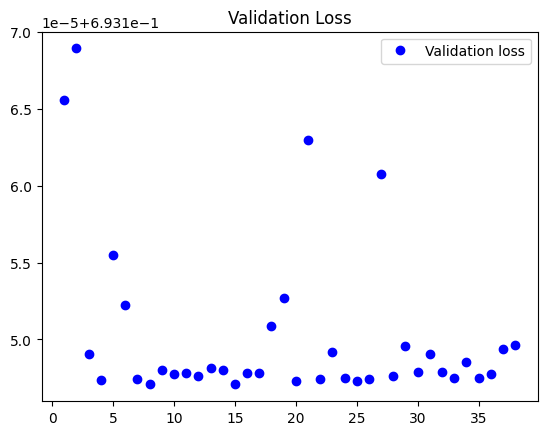

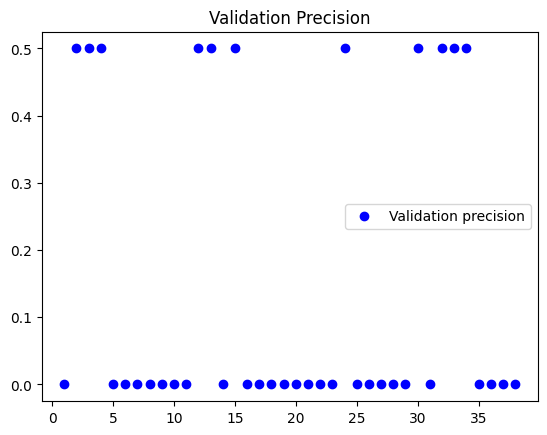

In [115]:
train_accuracy = history_vgg_pretrained.history["accuracy"]
train_loss = history_vgg_pretrained.history["loss"]
train_precision = history_vgg_pretrained.history["precision_33"]
val_accuracy = history_vgg_pretrained.history["val_accuracy"]
val_loss = history_vgg_pretrained.history["val_loss"]
val_precision = history_vgg_pretrained.history["val_precision_33"]
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, "bo", label="Training accuracy")
plt.title("Training Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, train_loss, "bo", label="Training loss")
plt.title("Training Loss")
plt.legend()
plt.show()
plt.plot(epochs, train_precision, "bo", label="Training precision")
plt.title("Training Precision")
plt.legend()
plt.show()
plt.plot(epochs, val_accuracy, "bo", label="Validation accuracy")
plt.title("Validation Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, val_loss, "bo", label="Validation loss")
plt.title("Validation Loss")
plt.legend()
plt.show()
plt.plot(epochs, val_precision, "bo", label="Validation precision")
plt.title("Validation Precision")
plt.legend()
plt.show()

<br></br>
### **Model Inference**

In [116]:
# Let's loads the best-performing model and evaluate on the test data

model = keras.models.load_model("vgg_pretrained_checkpoint_filepath")
model.evaluate(test_generator)

50/50 [==============================] - 1s 16ms/step - loss: 0.6931 - accuracy: 0.5000 - precision_33: 0.0000e+00


[0.6931471824645996, 0.5, 0.0]

<br></br>

**Using the VGG16 pre-trained model architecture and after fine-tuning on the political meme dataset for 50 epochs, we achieved a training accuracy of 0.4767 and a validation accuracy of 0.5. However, the training and validation accuracies were nearly stuck at 0.5 throughout all epochs, likely due to the limited amount of training data. The total time it took to fine-tune the VGG16 was 2 minutes. Despite these efforts, the test performance decreased compared to the base configuration; the accuracy with the VGG16 pre-trained weights and fine-tuning is 0.5, while the accuracy with the base configuration is 0.96. The next step is to create augmented data to see if the accuracy improves**

<br></br>
### **Pretrained Model - VGG16(Data Augmentation)**

In [117]:
data_augmentation = keras.Sequential(
    [
        layers.RandomRotation(0.2),  # 20 degrees
        layers.RandomTranslation(width_factor=0.2, height_factor=0.0),  # 20% shift
        layers.RandomBrightness(0.5),  # Brightness variation
        layers.RandomFlip("horizontal")  # Horizontal flip
    ]
)

In [118]:
from keras.applications.vgg16 import preprocess_input

def build_pretrained_vgg16(input_shape, n_classes):
    inputs = keras.Input(shape=input_shape)
    x = data_augmentation(inputs)
    x = preprocess_input(x)

    # Load the VGG16 model, pre-trained on ImageNet data
    base_model = keras.applications.VGG16(include_top=False, weights='imagenet', input_tensor=x)
    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    predictions = layers.Dense(1, activation='sigmoid')(x)  # Use 'sigmoid' for binary output

    model = keras.models.Model(inputs=base_model.input, outputs=predictions)

    # Freeze the first few layers to prevent them from being updated during the first phase of training
    for layer in base_model.layers[:7]:
        layer.trainable = False

    return model

# Specify the input shape and number of classes
vgg16_pretrained_model = build_pretrained_vgg16(input_shape, num_classes)

In [119]:
# Let's compile the CNN model using binary cross_entropy as loss function and adam as optimizer
vgg16_pretrained_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', keras.metrics.Precision()])

# Let's define the callbacks for Model saving and Early stopping

cb_check = keras.callbacks.ModelCheckpoint(
    filepath="vgg_pretrained_checkpoint_filepath",
    save_best_only=True,
    monitor="val_loss")

cb_early = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=30
)

# Let's train and validate model on the training and validation data

history_vgg_pretrained = vgg16_pretrained_model.fit(train_generator, validation_data = valid_generator, epochs = 50, verbose = 1, batch_size = 8, callbacks = [cb_check, cb_early])

Epoch 1/50
150/150 [==============================] - 13s 50ms/step - loss: 0.8948 - accuracy: 0.4733 - precision_34: 0.4767 - val_loss: 0.6937 - val_accuracy: 0.5000 - val_precision_34: 0.5000
Epoch 2/50
150/150 [==============================] - 8s 51ms/step - loss: 0.6938 - accuracy: 0.5000 - precision_34: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000 - val_precision_34: 0.5000
Epoch 3/50
150/150 [==============================] - 4s 26ms/step - loss: 0.6937 - accuracy: 0.4933 - precision_34: 0.4965 - val_loss: 0.6932 - val_accuracy: 0.5000 - val_precision_34: 0.0000e+00
Epoch 4/50
150/150 [==============================] - 4s 26ms/step - loss: 0.6937 - accuracy: 0.4600 - precision_34: 0.4464 - val_loss: 0.6932 - val_accuracy: 0.5000 - val_precision_34: 0.0000e+00
Epoch 5/50
150/150 [==============================] - 7s 46ms/step - loss: 0.6936 - accuracy: 0.4800 - precision_34: 0.4348 - val_loss: 0.6932 - val_accuracy: 0.5000 - val_precision_34: 0.0000e+00
Epoch 6/50
150/150 [==

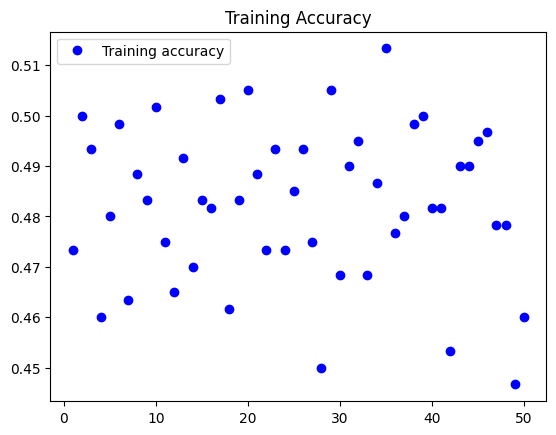

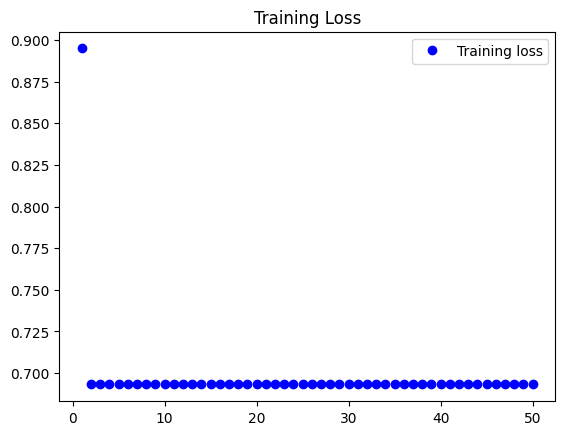

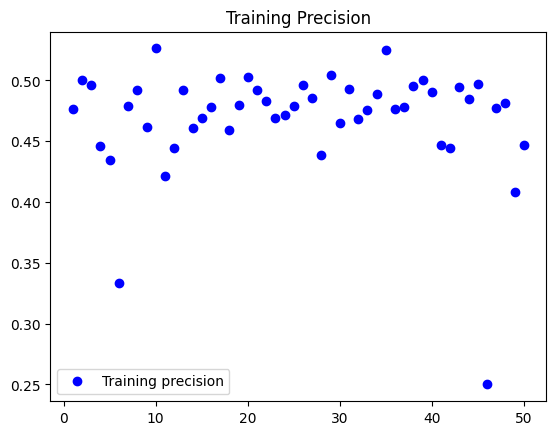

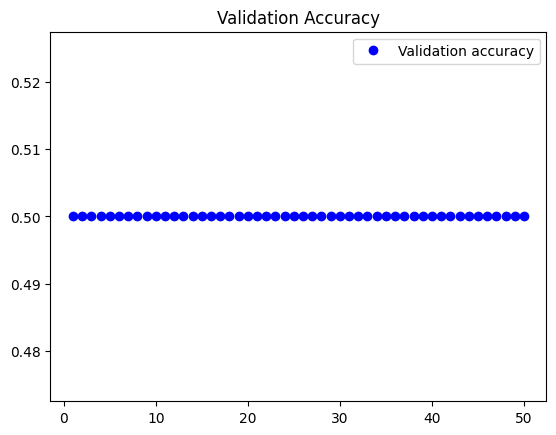

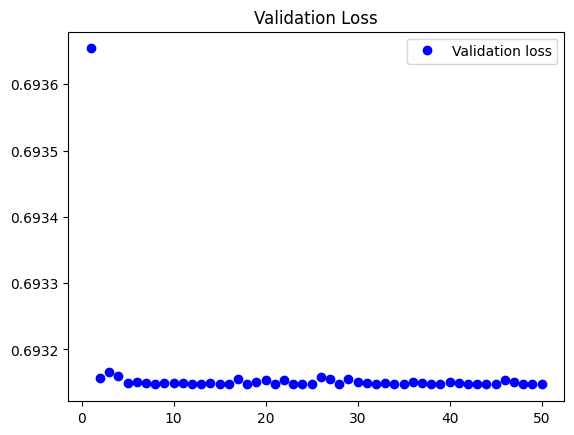

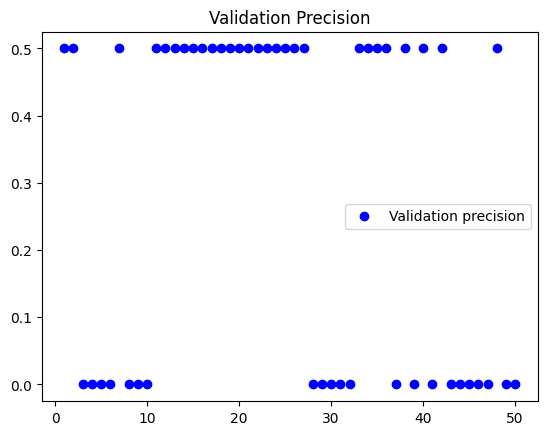

In [120]:
train_accuracy = history_vgg_pretrained.history["accuracy"]
train_loss = history_vgg_pretrained.history["loss"]
train_precision = history_vgg_pretrained.history["precision_34"]
val_accuracy = history_vgg_pretrained.history["val_accuracy"]
val_loss = history_vgg_pretrained.history["val_loss"]
val_precision = history_vgg_pretrained.history["val_precision_34"]
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, "bo", label="Training accuracy")
plt.title("Training Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, train_loss, "bo", label="Training loss")
plt.title("Training Loss")
plt.legend()
plt.show()
plt.plot(epochs, train_precision, "bo", label="Training precision")
plt.title("Training Precision")
plt.legend()
plt.show()
plt.plot(epochs, val_accuracy, "bo", label="Validation accuracy")
plt.title("Validation Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, val_loss, "bo", label="Validation loss")
plt.title("Validation Loss")
plt.legend()
plt.show()
plt.plot(epochs, val_precision, "bo", label="Validation precision")
plt.title("Validation Precision")
plt.legend()
plt.show()

<br></br>
### **Model Inference**

In [121]:
# Let's loads the best-performing model and evaluate on the test data

model = keras.models.load_model("vgg_pretrained_checkpoint_filepath")
model.evaluate(test_generator)

50/50 [==============================] - 1s 16ms/step - loss: 0.6931 - accuracy: 0.5000 - precision_34: 0.5000


[0.6931473016738892, 0.5, 0.5]

<br></br>

**Using the VGG16 pre-trained model architecture with data augmentation and after fine-tuning on the political meme dataset for 50 epochs, we achieved a training accuracy of 0.4600 and a validation accuracy of 0.5. However, the training and validation accuracies were nearly stuck at 0.50 throughout all epochs, likely due to the limited amount of training data. The total time it took to fine-tune the VGG16 was 2 minutes. Despite these efforts, the test performance decreased compared to the base configuration; the accuracy with the VGG16 pre-trained weights and fine-tuning is 0.5, while the accuracy with the base configuration is 0.96.**


<br></br>
#### **Evaluating the Impact of Advanced Architectures and Pre-trained Models on Validation Accuracy**
<br></br>

| Model Description                       | Validation Accuracy | Test Accuracy |
|-----------------------------------------|---------------------|---------------|
| DenseNet - Powerful Network Architecture| 0.9750              | 0.99          |
| ResNet - Powerful Network Architecture  | 0.82                | 0.75          |
| ResNet50 - Pretrained Model             | 0.9950              | 0.9850        |
| VGG16 - Pretrained Model                | 0.5                 | 0.5           |
| VGG16 - Pretrained Model (Data Augmentation) | 0.5           | 0.5           |
